# CCE Data - Preliminary data cleanup and MDS plots  
Authors: Abzer Kelminal (abzer.shah@uni-tuebingen.de) <br>
Input file format: .csv files directly from github <br> 
Outputs: .csv files and .svg files(plots) <br>
Dependencies: tidyverse, vegan, RcolorBrewer, svglite

---
**Necessary input files**:
1. Feature table --> output from MZMine3
2. Metadata table describing the filenames in feature table
3. GNPS annotation files obtained as a result of FBMN (here, Analog list file is used) 
---

# 1. Installing and loading dependencies:

In [4]:
options(install.packages.compile.from.source="never")

# Install the needed packages:
if (!require("tidyverse")) install.packages("tidyverse")
if (!require("vegan")) install.packages("vegan")
if (!require("RColorBrewer")) install.packages("RColorBrewer")
if (!require("svglite")) install.packages("svglite")

In [6]:
# calling the libraries:
library(dplyr)
library(ggplot2)
library(vegan) #For PcoA using Bray-Curtis distance
library(RColorBrewer) # to use colorblind-friendly colors
library(svglite) # for saving ggplots as svg

In [7]:
#'Global' settings for plot size in the output cell
options(repr.plot.width=10, repr.plot.height=8,res=600) #For google collab

# 2. Setting working directory:

### A. For Google Colab:
The following code creates a new folder 'My_TestData' in the Colab space and sets the folder as working directory. 

In [ ]:
#For Google Colab:
dir.create("/content/My_TestData", showWarnings = TRUE, recursive = FALSE, mode = "0777")
setwd("/content/My_TestData")

### B. For Jupyter Notebook:
For Jupyter Notebook you can set your local folder as working directory.

In [8]:
setwd("D:/Projects/cce github/PCoA_plots_Lihini")

In [9]:
print(list.files("."))

 [1] "111022_PCoA_Depth_0_20_8000_features.svg"          
 [2] "2023-02-08_Blank_removed_Cutoff_0.3.csv"           
 [3] "2023-02-08_Imputed_QuantTable_filled_with_1000.csv"
 [4] "2023-02-08_Normalised_Quant_table.csv"             
 [5] "2023-02-15_Blank_removed_Cutoff_0.3.csv"           
 [6] "2023-02-15_ft_md_merged_after_cleanup.csv"         
 [7] "230210_xgboost_with_all_depth"                     
 [8] "230210_xgboost_with_depth_0_50"                    
 [9] "analog_file_FBMN.tsv"                              
[10] "metadata_CCE.csv"                                  
[11] "PCoA_ASVs"                                         
[12] "PCoA_higher_depth_after_cleanup.svg"               
[13] "PCoA_higher_depth_before_cleanup.svg"              
[14] "PCoA_lower_depth_after_cleanup.svg"                
[15] "PCoA_lower_depth_before_cleanup.svg"               
[16] "PCoA_Metabolites"                                  
[17] "RF"                                                
[18] "RF_Resul

# 3. Loading the input data using URL (from GitHub):

In [10]:
# Directly calling the files from the github account:
ft_url <- "https://raw.githubusercontent.com/Functional-Metabolomics-Lab/CCE_Data-Analysis/main/NewFiles_Oct2022/CCE1706_MZmine3_GNPS_fixed_quant.csv"
md_url <- "https://raw.githubusercontent.com/Functional-Metabolomics-Lab/CCE_Data-Analysis/main/raw%20files/metadata_CCE.csv"

In [11]:
ft <- read.csv(ft_url, header = T, check.names = F)
md <- read.csv(md_url, header = T, check.names = F)

In [12]:
an <- read.csv("analog_file_FBMN.tsv", header = T, check.names = F, sep="\t")

In [13]:
head(ft)
dim(ft)

,row ID,row m/z,row retention time,row ion mobility,row ion mobility unit,row CCS,correlation group ID,annotation network number,best ion,auto MS2 verify,...,CCE_P1706_282_MSMS.mzXML Peak area,CCE_P1706_279_MSMS.mzXML Peak area,CCE_P1706_281_MSMS.mzXML Peak area,CCE_P1706_277_MSMS.mzXML Peak area,CCE_P1706_280_MSMS.mzXML Peak area,CCE_P1706_271_MSMS.mzXML Peak area,CCE_P1706_278_MSMS.mzXML Peak area,CCE_P1706_283_MSMS.mzXML Peak area,CCE_P1706_284_MSMS.mzXML Peak area,
,<int>,<dbl>,<dbl>,<lgl>,<lgl>,<lgl>,<int>,<int>,<chr>,<lgl>,...,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<lgl>
1,2492,150.1278,2.6763396,NA,NA,NA,NA,NA,,NA,...,0.0,0.0,0.0,0.00,0.0,0.00,0.0,0.0,0.0,NA
2,129,151.0352,0.5501944,NA,NA,NA,41,0,[M+NH4]+,NA,...,282609.8,579172.3,618307.2,41523.44,542946.1,848839.25,379528.4,300027.5,497668.8,NA
3,1112,151.0354,0.8179371,NA,NA,NA,NA,NA,,NA,...,0.0,0.0,0.0,0.00,0.0,0.00,0.0,0.0,0.0,NA
4,3075,151.0727,2.8642000,NA,NA,NA,NA,NA,,NA,...,0.0,0.0,0.0,0.00,0.0,0.00,0.0,0.0,0.0,NA
5,542,152.0569,0.8361904,NA,NA,NA,NA,NA,,NA,...,0.0,0.0,0.0,21533.63,0.0,12931.03,33309.2,73446.8,449260.9,NA
6,31563,152.9949,8.7610170,NA,NA,NA,NA,NA,,NA,...,0.0,0.0,0.0,0.00,0.0,0.00,0.0,0.0,0.0,NA


[1] 10645   317

In [14]:
head(md)
dim(md)

,filename,ATTRIBUTE_x,ATTRIBUTE_y,ATTRIBUTE_z,ATTRIBUTE_Spot_size,ATTRIBUTE_Filament_Possition,ATTRIBUTE_Sample_Number,ATTRIBUTE_Date,ATTRIBUTE_Cast,ATTRIBUTE_Event_Number,...,ATTRIBUTE_O2_Saturation__per_,ATTRIBUTE_O2_saturation_binned,ATTRIBUTE_PO4,ATTRIBUTE_NO2,ATTRIBUTE_NO3,ATTRIBUTE_NH4,ATTRIBUTE_PO4_binned,ATTRIBUTE_NO2_binned,ATTRIBUTE_NO3_binned,ATTRIBUTE_NH4_binned
,<chr>,<dbl>,<dbl>,<dbl>,<int>,<chr>,<int>,<int>,<int>,<int>,...,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>
1,Blank_CCE_P1706_1.mzxml,0.0,0.0,0.0,1,Blank,1,20170602,NA,NA,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
2,Blank_CCE_P1706_2.mzxml,0.0,0.0,0.0,1,Blank,2,20170602,NA,NA,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
3,CCE_P1706_3.mzxml,-80.1,85.1,101.5,1,Control,3,20170602,2,NA,...,NA,NA,3.631,1.851,12.690,0.498,3.6,1.9,13,0.5
4,CCE_P1706_4.mzxml,-80.1,85.1,101.5,1,Control,4,20170602,2,NA,...,NA,NA,3.631,1.851,12.690,0.498,3.6,1.9,13,0.5
5,CCE_P1706_5.mzxml,-80.1,85.1,102.5,1,Control,5,20170602,2,NA,...,NA,NA,3.360,0.344,19.899,0.022,3.4,0.3,20,0.0
6,CCE_P1706_6.mzxml,-80.1,85.1,102.5,1,Control,6,20170602,2,NA,...,NA,NA,3.360,0.344,19.899,0.022,3.4,0.3,20,0.0


[1] 230  33

In [15]:
head(an)
dim(an)

,SpectrumID,Compound_Name,Ion_Source,Instrument,Compound_Source,PI,Data_Collector,Adduct,Precursor_MZ,ExactMass,...,MoleculeExplorerDatasets,MoleculeExplorerFiles,InChIKey,InChIKey-Planar,superclass,class,subclass,npclassifier_superclass,npclassifier_class,npclassifier_pathway
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,...,<int>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
1,CCMSLIB00005466091,Hexa-methoxymethyl-melamine,LC-ESI,Orbitrap,Commercial,Daniel Petras,Daniel Petras,M+H,391.230,391.230,...,0,0,BNCADMBVWNPPIZ-UHFFFAOYSA-N,BNCADMBVWNPPIZ,Organic nitrogen compounds,Organonitrogen compounds,Amines,,,Alkaloids
2,CCMSLIB00005691900,N-geranyl-L-glutamic acid,LC-ESI,Orbitrap,Other,Bradley S. Moore,Monica Thukral Daniel Petras,M+H,284.185,284.185,...,0,0,WRAUYKHQSOIVEN-SRXBQZRASA-O,WRAUYKHQSOIVEN,Organic acids and derivatives,Carboxylic acids and derivatives,"Amino acids, peptides, and analogues",N/A,N/A,N/A
3,CCMSLIB00005691898,7'-carboxy-N-geranyl-L-gluatamic acid,LC-ESI,Orbitrap,Other,Bradley S. Moore,Monica Thukral Daniel Petras,M+H,314.159,314.159,...,0,0,GLOMHRXTBJVWKY-UIZYFNENSA-O,GLOMHRXTBJVWKY,Organic acids and derivatives,Carboxylic acids and derivatives,"Amino acids, peptides, and analogues",N/A,N/A,N/A
4,CCMSLIB00003134553,Spectral Match to 1-Hexadecyl-sn-glycero-3-phosphocholine from NIST14,ESI,Ion Trap,Isolated,Data from Pieter Dorrestein,Data deposited by daniel,M+H,482.360,481.353,...,35,2444,VLBPIWYTPAXCFJ-XMMPIXPASA-N,VLBPIWYTPAXCFJ,Lipids and lipid-like molecules,Glycerophospholipids,Glycerophosphocholines,N/A,N/A,N/A
5,CCMSLIB00004680136,Loliolide,LC-ESI,Orbitrap,Crude,Lihini Aluwihare,Daniel Petras,M+H,197.117,0.000,...,25,1085,XEVQXKKKAVVSMW-UHFFFAOYSA-N,XEVQXKKKAVVSMW,N/A,N/A,N/A,Apocarotenoids,Apocarotenoids (Î²-),Terpenoids
6,CCMSLIB00003135504,"Spectral Match to Pyrimido[1,2-a]azepine, 2,3,4,6,7,8,9,10-octahydro- from NIST14",ESI,HCD,Isolated,Data from Pieter Dorrestein;David Touboul,Data deposited by lfnothias,M+H,153.139,0.000,...,0,0,N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A


[1] 5543   46

# 4. Merging annotation information to the feature table:
The first column in feature table: <b>row ID</b> is given in different column names in different annotation files: <br>
* In clusterinfo summary file of GNPS, it is given under <b>Cluster index</b> ('LibraryID' column has the spectral match annotations)
* In DB analog result file (which is used here),it is given as <b>#Scan#</b> ('Compound_Name' column has the annotation information)
* For SIRIUS and CANOPUS summary files, the row ID of the feature table is given in the column <b>id</b>. A typical feature would be: "3_ProjectName_MZmine3_SIRIUS_1_16", where the last number 16 representing the row ID.

In [ ]:
#Getting only the necessary information from the annotation table:
an_name <- an[,c('Compound_Name','#Scan#')]
head(an_name)

In [ ]:
new_ft <- ft #stroring ft into a new variable 'new_ft'
new_ft <- merge(new_ft, an_name, by.x="row ID", by.y="#Scan#", all.x=TRUE) # merging the annotation names to new_ft

head(new_ft,2)
dim(new_ft)

In [ ]:
#Naming the rows of new_ft as row ID, m/z value ,RT  and compound names:
rownames(new_ft) <- paste(paste0("X",new_ft$'row ID'),
                          round(new_ft$'row m/z',digits = 3),
                          round(new_ft$'row retention time',digits = 3),
                          new_ft$'Compound_Name',
                          sep = '_') 

In [ ]:
# Arranging the feature table in the right format for further analysis:
new_ft <- new_ft[,grep('mzXML',colnames(new_ft))] # only picking mzXML files
new_ft <- new_ft[,-grep('_STKL',colnames(new_ft))] # excluding the STKL columns
colnames(new_ft) <- gsub('_MSMS.mzXML Peak area','.mzxml',colnames(new_ft))  #substituting the file extension in the colnames of new_ft with mzxml

head(new_ft,2)

In [ ]:
new_ft <- new_ft[,order(colnames(new_ft))] #ordering the columns by names
head(new_ft,2)

In [ ]:
new_ft <- new_ft[,-1] # Removing the column "Brandon_Deep_DOM"

head(new_ft,2)
dim(new_ft)

# 5. Arranging feature table and metadata in the same order

In [16]:
# Arranging the metadata table in the right format for further analysis:
md <- md[,colSums(is.na(md))<nrow(md)] #removing NA columns in md, if any present
rownames(md) <- md$filename 
md <- md[,-1]
rownames(md) <- gsub('Blank_','',rownames(md)) # Removing "Blank" in the 1st two row names of md

In [17]:
head(md)
dim(md)

,ATTRIBUTE_x,ATTRIBUTE_y,ATTRIBUTE_z,ATTRIBUTE_Spot_size,ATTRIBUTE_Filament_Possition,ATTRIBUTE_Sample_Number,ATTRIBUTE_Date,ATTRIBUTE_Cast,ATTRIBUTE_Event_Number,ATTRIBUTE_Bottle,...,ATTRIBUTE_O2_Saturation__per_,ATTRIBUTE_O2_saturation_binned,ATTRIBUTE_PO4,ATTRIBUTE_NO2,ATTRIBUTE_NO3,ATTRIBUTE_NH4,ATTRIBUTE_PO4_binned,ATTRIBUTE_NO2_binned,ATTRIBUTE_NO3_binned,ATTRIBUTE_NH4_binned
,<dbl>,<dbl>,<dbl>,<int>,<chr>,<int>,<int>,<int>,<int>,<int>,...,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>
CCE_P1706_1.mzxml,0.0,0.0,0.0,1,Blank,1,20170602,NA,NA,NA,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
CCE_P1706_2.mzxml,0.0,0.0,0.0,1,Blank,2,20170602,NA,NA,NA,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
CCE_P1706_3.mzxml,-80.1,85.1,101.5,1,Control,3,20170602,2,NA,2,...,NA,NA,3.631,1.851,12.690,0.498,3.6,1.9,13,0.5
CCE_P1706_4.mzxml,-80.1,85.1,101.5,1,Control,4,20170602,2,NA,2,...,NA,NA,3.631,1.851,12.690,0.498,3.6,1.9,13,0.5
CCE_P1706_5.mzxml,-80.1,85.1,102.5,1,Control,5,20170602,2,NA,4,...,NA,NA,3.360,0.344,19.899,0.022,3.4,0.3,20,0.0
CCE_P1706_6.mzxml,-80.1,85.1,102.5,1,Control,6,20170602,2,NA,4,...,NA,NA,3.360,0.344,19.899,0.022,3.4,0.3,20,0.0


[1] 230  32

In [25]:
#picking only the columns in new_ft that are comparable to rownames of md
ft_final <- new_ft[,which(colnames(new_ft)%in%rownames(md))] 

#returns the matched position of rownames of md to that of colnames of new_ft
ft_final  <- new_ft[,match(rownames(md),colnames(new_ft))] 

#checking if the colnames of ft_final and rownames of md matched. Should return TRUE
identical(colnames(ft_final),rownames(md)) 

[1] TRUE

In [26]:
dim(ft_final)
dim(md)

[1] 10645   230

[1] 230  32

The dimensions show that nrow(ft_final)=ncol(md), thus eligible for matrix multiplication. Therefore, we can apply several calculations on these tables such as PCA etc.

In [27]:
#Loading in the helper functions from the additional R script:
source('https://raw.githubusercontent.com/Functional-Metabolomics-Lab/CCE_Data-Analysis/main/Helper_functions.R')

# 6. Data Cleanup

## 1) Blank Removal

<p style='text-align: justify;'> Blank samples contain no analytes of interest and consist, for example, of the solvent, matrix, tissue or growth media that was used to prepare or dissolve the samples and analytes of interest. Such as the analytes, the mass spectral features deriving from blank samples are also detected by the LC-MS/MS instrument. We need to remove these blank features to obtain accurate results.</p>

1. To eliminate these blank features, we first split the feature table into blanks and samples, and then use a cutoff filter. 
2. Next, we calculate the average feature intensities for the blanks and samples, and subsequently calculate the ratio of average_feature_blanks to average_feature_sample. 
3. We compare this ratio against the user-defined cutoff to determine which features to be removed. 
4. When the cutoff is set to 0.3, it implies that for any feature, up to 30% contribution from the blank and 70% from the sample are allowed. Hence any feature with a ratio greater than 0.3 is removed. By using a lower cutoff, such as 10% (0.1), we would demand a greater contribution from the sample (90%) and restrict the blank's contribution to 10%. 
5. Increasing the cutoff leads to identifying fewer background features and observing more analyte features. On the contrary, lowering the cutoff is more rigorous and leads to the removal of more features.</p>

In [28]:
head(ft_final)

,CCE_P1706_1.mzxml,CCE_P1706_2.mzxml,CCE_P1706_3.mzxml,CCE_P1706_4.mzxml,CCE_P1706_5.mzxml,CCE_P1706_6.mzxml,CCE_P1706_7.mzxml,CCE_P1706_8.mzxml,CCE_P1706_9.mzxml,CCE_P1706_10.mzxml,...,CCE_P1706_221.mzxml,CCE_P1706_222.mzxml,CCE_P1706_223.mzxml,CCE_P1706_224.mzxml,CCE_P1706_225.mzxml,CCE_P1706_226.mzxml,CCE_P1706_227.mzxml,CCE_P1706_228.mzxml,CCE_P1706_229.mzxml,CCE_P1706_230.mzxml
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,...,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
X3_161.082_0.101_Massbank:LU101103 3-Methyl-1-phenyl-1H-pyrazol-5-amine|5-methyl-2-phenylpyrazol-3-amine,0.0000,0.00,0.000,0.00,0.000,0.000,0.000,0.000,0.000,0.000,...,87949.29,74579.71,98324.2,73628.47,97452.70,0.00,91982.75,79621.98,78646.30,108310.20
X5_182.985_0.114_DIHYDROOROTATE - 30.0 eV,21988.0590,52721.31,0.000,28778.43,89113.390,9749.107,86760.090,32274.844,93150.890,1171.029,...,0.00,0.00,0.0,0.00,0.00,37255.46,0.00,0.00,0.00,0.00
X7_391.284_0.171_NA,895.5041,10028.54,28523.586,15833.24,5560.383,32958.350,21182.297,12901.981,14890.969,19658.627,...,40024.35,38679.49,40051.2,40492.32,37842.25,36979.01,38256.11,39175.27,39132.95,39646.22
X8_181.049_0.206_NA,170458.3800,83740.25,81888.640,159878.61,103632.600,166121.700,312793.030,117835.440,176150.050,81477.110,...,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00
X15_177.091_0.411_4-HYDROXYPHENYL ACETIC ACID,100032.8400,69778.82,9088.911,23775.75,9459.410,6514.407,6586.185,0.000,0.000,2716.402,...,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00
X16_223.096_0.467_GA5 CollisionEnergy:102040,250727.9000,188487.45,27795.121,84783.08,16772.562,8897.433,7836.989,9733.865,9398.226,37140.164,...,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00


In [29]:
#Splitting the samples: 
Blank <-  ft_final[,1:2]
Samples <- ft_final[,-1:-2]

For the code below, <font color='red'> I gave a cutoff value: 0.3 </font>

In [30]:
input_data <- ft_final

#When cutoff is low, more noise (or background) detected; With higher cutoff, less background detected, thus more features observed
Cutoff <- as.numeric(readline('Enter Cutoff value between 0.1 & 1:')) # (i.e. 10% - 100%). Ideal cutoff range: 0.1-0.3
    
#Getting mean for every feature in blank and Samples
Avg_blank <- rowMeans(Blank, na.rm= FALSE, dims = 1) # set na.rm = FALSE to check if there are NA values. When set as TRUE, NA values are changed to 0
Avg_samples <- rowMeans(Samples, na.rm= FALSE, dims = 1)
    
    #Getting the ratio of blank vs Sample
Ratio_blank_Sample <- (Avg_blank+1)/(Avg_samples+1)
    
    # Creating a bin with 1s when the ratio>Cutoff, else put 0s
Bg_bin <- ifelse(Ratio_blank_Sample > Cutoff, 1, 0 )
Blank_removal <- cbind(Samples,Bg_bin)

# Checking if there are any NA values present. Having NA values in the 4 variables will affect the final dataset to be created
temp_NA_Count <-cbind(Avg_blank ,Avg_samples,Ratio_blank_Sample,Bg_bin)
    
print('No of NA values in the following columns:')
print(colSums(is.na(temp_NA_Count)))

#Calculating the number of background features and features present
print(paste("No.of Background or noise features:",sum(Bg_bin ==1,na.rm = TRUE)))
print(paste("No.of features after excluding noise:",(nrow(Samples) - sum(Bg_bin ==1,na.rm = TRUE)))) 

Blank_removal <- Blank_removal %>% filter(Bg_bin == 0) # Taking only the feature signals
Blank_removal <- as.matrix(Blank_removal[,-ncol(Blank_removal)]) # removing the last column Bg_bin}

Enter Cutoff value between 0.1 & 1: 0.3


[1] "No of NA values in the following columns:"
         Avg_blank        Avg_samples Ratio_blank_Sample             Bg_bin 
                 0                  0                  0                  0 
[1] "No.of Background or noise features: 1914"
[1] "No.of features after excluding noise: 8731"


In [34]:
write.csv(Blank_removal, paste0(Sys.Date(),'_Blank_removed_Cutoff_',Cutoff,'.csv'),row.names =TRUE) 

In [31]:
head(Blank_removal)
dim(Blank_removal)

,CCE_P1706_3.mzxml,CCE_P1706_4.mzxml,CCE_P1706_5.mzxml,CCE_P1706_6.mzxml,CCE_P1706_7.mzxml,CCE_P1706_8.mzxml,CCE_P1706_9.mzxml,CCE_P1706_10.mzxml,CCE_P1706_11.mzxml,CCE_P1706_12.mzxml,...,CCE_P1706_221.mzxml,CCE_P1706_222.mzxml,CCE_P1706_223.mzxml,CCE_P1706_224.mzxml,CCE_P1706_225.mzxml,CCE_P1706_226.mzxml,CCE_P1706_227.mzxml,CCE_P1706_228.mzxml,CCE_P1706_229.mzxml,CCE_P1706_230.mzxml
X3_161.082_0.101_Massbank:LU101103 3-Methyl-1-phenyl-1H-pyrazol-5-amine|5-methyl-2-phenylpyrazol-3-amine,0.000,0.00,0.000,0.00,0.000,0.000,0.00,0.000,0.000,0.00,...,87949.290,74579.710,98324.195,73628.47,97452.700,0.00,91982.75,79621.98,78646.300,108310.195
X7_391.284_0.171_NA,28523.586,15833.24,5560.383,32958.35,21182.297,12901.981,14890.97,19658.627,3587.404,23878.93,...,40024.350,38679.490,40051.200,40492.32,37842.250,36979.01,38256.11,39175.27,39132.950,39646.223
X17_391.284_0.409_NA,31048.430,10877.30,12117.295,31687.30,27867.467,9619.281,14602.03,6940.041,27998.416,4577.63,...,39230.426,38579.330,39523.062,36822.64,37117.715,42031.96,39620.44,23236.96,40027.184,36681.434
X20_161.082_0.451_Massbank:LU101103 3-Methyl-1-phenyl-1H-pyrazol-5-amine|5-methyl-2-phenylpyrazol-3-amine,0.000,0.00,0.000,0.00,0.000,0.000,0.00,0.000,0.000,0.00,...,10491.838,31635.910,47544.970,66987.88,41803.250,33796.71,65040.16,41113.98,11109.146,13286.548
X47_255.938_0.543_NA,93200.805,97741.95,63960.484,64227.06,26672.342,46512.383,43146.63,21227.684,22008.434,16249.09,...,13284.214,7469.002,13207.947,12219.81,9117.898,0.00,20029.18,20960.15,7327.850,5091.297
X48_231.971_0.542_NA,9214.284,16686.40,1156.325,12251.66,6519.574,11257.340,18904.93,7235.251,15255.188,12154.16,...,6641.435,3035.749,7068.742,11844.05,6260.775,0.00,15327.97,14572.92,4956.732,0.000


[1] 8731  228

## 2) Imputation
<p style='text-align: justify;'> For several reasons, real world datasets might have some missing values in it, in the form of NA, NANs or 0s. Eventhough the gapfilling step of MZmine fills the missing values, we still end up with some missing values or 0s in our feature table. This could be problematic for statistical analysis. </p> 
<p style='text-align: justify;'> In order to have a better dataset, we cannot simply discard those rows or columns with missing values as we will lose a chunk of our valuable data. Instead we can try imputing those missing values. Imputation involves replacing the missing values in the data with a meaningful, reasonable guess. There are several methods, such as: </p> 
  
1) Mean imputation (replacing the missing values in a column with the mean or average of the column)  
2) Replacing it with the most frequent value  
3) Several other machine learning imputation methods such as k-nearest neighbors algorithm(k-NN), Hidden Markov Model(HMM)

The method that we use is: Replacing the zeros from the gapfilled quant table with the Cutoff_LOD value.

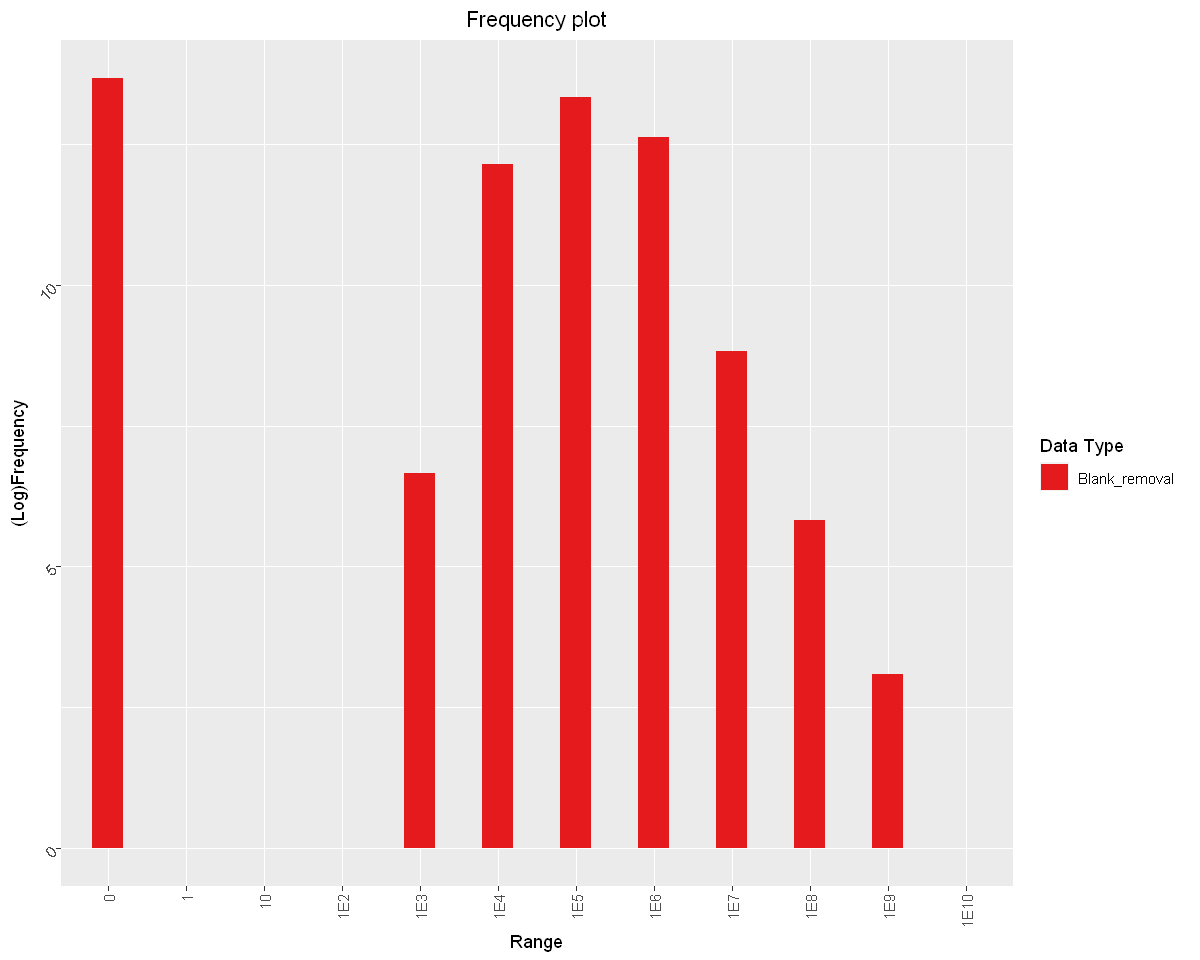

In [32]:
#This function takes in two input variables, 
#since we want to see the frequency distribution of only one dataframe, we have given it twice
FrequencyPlot(Blank_removal,Blank_removal) 

In [33]:
min_LOD <- round(min(Blank_removal[Blank_removal!=min(Blank_removal)]))
print(paste0("The minimum value greater than 0 in gap-filled table: ",min_LOD)) 

[1] "The minimum value greater than 0 in gap-filled table: 890"


For the code below, <font color='red'> I gave a LOD value: 1000 </font>

In [35]:
Cutoff_LOD <- as.numeric(readline("Enter your Cutoff LOD as seen in the plot or your desired value for imputation:"))  #Enter the LOD value as seen in the frequency plot
Imputed <- Blank_removal
Imputed[Imputed <Cutoff_LOD] <- Cutoff_LOD

Enter your Cutoff LOD as seen in the plot or your desired value for imputation: 1000


In [36]:
head(Imputed)
dim(Imputed)

,CCE_P1706_3.mzxml,CCE_P1706_4.mzxml,CCE_P1706_5.mzxml,CCE_P1706_6.mzxml,CCE_P1706_7.mzxml,CCE_P1706_8.mzxml,CCE_P1706_9.mzxml,CCE_P1706_10.mzxml,CCE_P1706_11.mzxml,CCE_P1706_12.mzxml,...,CCE_P1706_221.mzxml,CCE_P1706_222.mzxml,CCE_P1706_223.mzxml,CCE_P1706_224.mzxml,CCE_P1706_225.mzxml,CCE_P1706_226.mzxml,CCE_P1706_227.mzxml,CCE_P1706_228.mzxml,CCE_P1706_229.mzxml,CCE_P1706_230.mzxml
X3_161.082_0.101_Massbank:LU101103 3-Methyl-1-phenyl-1H-pyrazol-5-amine|5-methyl-2-phenylpyrazol-3-amine,1000.000,1000.00,1000.000,1000.00,1000.000,1000.000,1000.00,1000.000,1000.000,1000.00,...,87949.290,74579.710,98324.195,73628.47,97452.700,1000.00,91982.75,79621.98,78646.300,108310.195
X7_391.284_0.171_NA,28523.586,15833.24,5560.383,32958.35,21182.297,12901.981,14890.97,19658.627,3587.404,23878.93,...,40024.350,38679.490,40051.200,40492.32,37842.250,36979.01,38256.11,39175.27,39132.950,39646.223
X17_391.284_0.409_NA,31048.430,10877.30,12117.295,31687.30,27867.467,9619.281,14602.03,6940.041,27998.416,4577.63,...,39230.426,38579.330,39523.062,36822.64,37117.715,42031.96,39620.44,23236.96,40027.184,36681.434
X20_161.082_0.451_Massbank:LU101103 3-Methyl-1-phenyl-1H-pyrazol-5-amine|5-methyl-2-phenylpyrazol-3-amine,1000.000,1000.00,1000.000,1000.00,1000.000,1000.000,1000.00,1000.000,1000.000,1000.00,...,10491.838,31635.910,47544.970,66987.88,41803.250,33796.71,65040.16,41113.98,11109.146,13286.548
X47_255.938_0.543_NA,93200.805,97741.95,63960.484,64227.06,26672.342,46512.383,43146.63,21227.684,22008.434,16249.09,...,13284.214,7469.002,13207.947,12219.81,9117.898,1000.00,20029.18,20960.15,7327.850,5091.297
X48_231.971_0.542_NA,9214.284,16686.40,1156.325,12251.66,6519.574,11257.340,18904.93,7235.251,15255.188,12154.16,...,6641.435,3035.749,7068.742,11844.05,6260.775,1000.00,15327.97,14572.92,4956.732,1000.000


[1] 8731  228

In [ ]:
write.csv(Imputed,paste0(Sys.Date(),'_Imputed_QuantTable_filled_with_',Cutoff_LOD,'.csv'),row.names =T)

In [37]:
Imputed[rowMeans(Imputed)== Cutoff_LOD,,drop=F] #these rows or features are full of Cutoff_LOD values

,CCE_P1706_3.mzxml,CCE_P1706_4.mzxml,CCE_P1706_5.mzxml,CCE_P1706_6.mzxml,CCE_P1706_7.mzxml,CCE_P1706_8.mzxml,CCE_P1706_9.mzxml,CCE_P1706_10.mzxml,CCE_P1706_11.mzxml,CCE_P1706_12.mzxml,...,CCE_P1706_221.mzxml,CCE_P1706_222.mzxml,CCE_P1706_223.mzxml,CCE_P1706_224.mzxml,CCE_P1706_225.mzxml,CCE_P1706_226.mzxml,CCE_P1706_227.mzxml,CCE_P1706_228.mzxml,CCE_P1706_229.mzxml,CCE_P1706_230.mzxml
X41340_566.412_12.504_NA,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,...,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000
X41450_999.29_12.681_Contaminant vial septum ThermoFisher C5000-44B,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,...,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000


In [38]:
#removing all the rows with only cutoff values:
Imputed<-Imputed[rowMeans(Imputed)!= Cutoff_LOD,]  
dim(Imputed)

[1] 8729  228

Calculating Sparsity of the imputed table:

In [39]:
sum(Imputed==1000)

[1] 867665

In [40]:
#calculation data sparsity
(sum(Imputed == 1000)*100)/prod(dim(Imputed))

[1] 43.59661

44% of the data is sparse.

### Performing imputation as mentioned in "A hitchhiker's guide to statistical analysis on non-targetedd LC-MS/MS data":

In [41]:
# Creating random variables (between 0 and Cutoff_LOD) to replace all zeros
set.seed(141222) # by setting a seed, we generate the same set of random number all the time
ran_val <-round(runif(length(Blank_removal),0,min_LOD),digits=1)
ran_val[1:10]

[1] 770.6 182.7 251.6 202.5 131.6 113.6 520.1 811.5 798.7 208.1

In [44]:
Blank_removal <- data.frame(Blank_removal)

imp <- Blank_removal  %>% mutate(across(everything(),
                                  ~replace(., . == 0 , # here '.' represents the dataframe 'Blank_removal'
                                           sample(ran_val, size=1)))) # sample function pick one random sample from 'ran_val'
head(imp, 2)

,CCE_P1706_3.mzxml,CCE_P1706_4.mzxml,CCE_P1706_5.mzxml,CCE_P1706_6.mzxml,CCE_P1706_7.mzxml,CCE_P1706_8.mzxml,CCE_P1706_9.mzxml,CCE_P1706_10.mzxml,CCE_P1706_11.mzxml,CCE_P1706_12.mzxml,...,CCE_P1706_221.mzxml,CCE_P1706_222.mzxml,CCE_P1706_223.mzxml,CCE_P1706_224.mzxml,CCE_P1706_225.mzxml,CCE_P1706_226.mzxml,CCE_P1706_227.mzxml,CCE_P1706_228.mzxml,CCE_P1706_229.mzxml,CCE_P1706_230.mzxml
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,...,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
X3_161.082_0.101_Massbank:LU101103 3-Methyl-1-phenyl-1H-pyrazol-5-amine|5-methyl-2-phenylpyrazol-3-amine,463.90,96.60,143.900,342.30,332.7,45.20,131.30,431.90,445.900,272.30,...,87949.29,74579.71,98324.2,73628.47,97452.70,198.10,91982.75,79621.98,78646.30,108310.20
X7_391.284_0.171_NA,28523.59,15833.24,5560.383,32958.35,21182.3,12901.98,14890.97,19658.63,3587.404,23878.93,...,40024.35,38679.49,40051.2,40492.32,37842.25,36979.01,38256.11,39175.27,39132.95,39646.22


In [45]:
sum(imp==0) # checking if there are any zeros in our imputed table 

[1] 0

Now you can see the sparsity is 0.

## 3) Normalization
The following code performs sample-centric (column-wise) normalisation:

In [46]:
#Getting column-wise sums of the input-data
sample_sum <- colSums(Imputed, na.rm= T, dims = 1)
    
#Dividing each element of a particular column with its column sum
Normalized_data <- c()
for (i in 1:ncol(Imputed)){
  x <- Imputed[,i] / sample_sum[i]
  Normalized_data <- cbind(Normalized_data, x)
  }
colnames(Normalized_data) <- names(sample_sum)

head(Normalized_data)
dim(Normalized_data)
  
print(paste('No.of NA values in Normalized data:',sum(is.na(Normalized_data)== T)))

,CCE_P1706_3.mzxml,CCE_P1706_4.mzxml,CCE_P1706_5.mzxml,CCE_P1706_6.mzxml,CCE_P1706_7.mzxml,CCE_P1706_8.mzxml,CCE_P1706_9.mzxml,CCE_P1706_10.mzxml,CCE_P1706_11.mzxml,CCE_P1706_12.mzxml,...,CCE_P1706_221.mzxml,CCE_P1706_222.mzxml,CCE_P1706_223.mzxml,CCE_P1706_224.mzxml,CCE_P1706_225.mzxml,CCE_P1706_226.mzxml,CCE_P1706_227.mzxml,CCE_P1706_228.mzxml,CCE_P1706_229.mzxml,CCE_P1706_230.mzxml
X3_161.082_0.101_Massbank:LU101103 3-Methyl-1-phenyl-1H-pyrazol-5-amine|5-methyl-2-phenylpyrazol-3-amine,2.943954e-06,3.709993e-06,2.753221e-06,2.078987e-06,2.450799e-06,2.832353e-06,3.114054e-06,2.560052e-06,2.897280e-06,2.531813e-06,...,2.802803e-04,2.101376e-04,2.434887e-04,2.096579e-04,1.692954e-04,2.049478e-06,1.716745e-04,1.523602e-04,1.456521e-04,2.095756e-04
X7_391.284_0.171_NA,8.397213e-05,5.874120e-05,1.530897e-05,6.851999e-05,5.191356e-05,3.654297e-05,4.637129e-05,5.032710e-05,1.039371e-05,6.045697e-05,...,1.275512e-04,1.089843e-04,9.918226e-05,1.153023e-04,6.573976e-05,7.578766e-05,7.140031e-05,7.496360e-05,7.247381e-05,7.671376e-05
X17_391.284_0.409_NA,9.140516e-05,4.035471e-05,3.336159e-05,6.587749e-05,6.829756e-05,2.724520e-05,4.547152e-05,1.776686e-05,8.111925e-05,1.158970e-05,...,1.250211e-04,1.087021e-04,9.787439e-05,1.048529e-04,6.448109e-05,8.614358e-05,7.394668e-05,4.446494e-05,7.412992e-05,7.097701e-05
X20_161.082_0.451_Massbank:LU101103 3-Methyl-1-phenyl-1H-pyrazol-5-amine|5-methyl-2-phenylpyrazol-3-amine,2.943954e-06,3.709993e-06,2.753221e-06,2.078987e-06,2.450799e-06,2.832353e-06,3.114054e-06,2.560052e-06,2.897280e-06,2.531813e-06,...,3.343581e-05,8.913811e-05,1.177397e-04,1.907487e-04,7.262083e-05,6.926562e-05,1.213894e-04,7.867341e-05,2.057402e-05,2.570891e-05
X47_255.938_0.543_NA,2.743789e-04,3.626220e-04,1.760974e-04,1.335272e-04,6.536855e-05,1.317395e-04,1.343610e-04,5.434397e-05,6.376460e-05,4.113967e-05,...,4.233467e-05,2.104484e-05,3.270798e-05,3.479605e-05,1.583966e-05,2.049478e-06,3.738200e-05,4.010817e-05,1.357110e-05,9.851444e-06
X48_231.971_0.542_NA,2.712643e-05,6.190642e-05,3.183619e-06,2.547105e-05,1.597817e-05,3.188476e-05,5.887098e-05,1.852262e-05,4.419855e-05,3.077207e-05,...,2.116519e-05,8.553600e-06,1.750494e-05,3.372607e-05,1.087625e-05,2.049478e-06,2.860777e-05,2.788593e-05,9.179815e-06,1.934957e-06


[1] 8729  228

[1] "No.of NA values in Normalized data: 0"


---
Repeating the same with the other imputed table:

In [49]:
imp <- as.matrix(imp)

#Getting column-wise sums of the input-data
sam_sum <- colSums(imp, na.rm= T, dims = 1)
    
#Dividing each element of a particular column with its column sum
norm_data <- c()
for (i in 1:ncol(imp)){
  x <- imp[,i] / sam_sum[i]
  norm_data <- cbind(norm_data, x)
  }
colnames(norm_data) <- names(sam_sum)

head(norm_data)
dim(norm_data)
  
print(paste('No.of NA values in Normalized data:',sum(is.na(norm_data)== T)))

,CCE_P1706_3.mzxml,CCE_P1706_4.mzxml,CCE_P1706_5.mzxml,CCE_P1706_6.mzxml,CCE_P1706_7.mzxml,CCE_P1706_8.mzxml,CCE_P1706_9.mzxml,CCE_P1706_10.mzxml,CCE_P1706_11.mzxml,CCE_P1706_12.mzxml,...,CCE_P1706_221.mzxml,CCE_P1706_222.mzxml,CCE_P1706_223.mzxml,CCE_P1706_224.mzxml,CCE_P1706_225.mzxml,CCE_P1706_226.mzxml,CCE_P1706_227.mzxml,CCE_P1706_228.mzxml,CCE_P1706_229.mzxml,CCE_P1706_230.mzxml
X3_161.082_0.101_Massbank:LU101103 3-Methyl-1-phenyl-1H-pyrazol-5-amine|5-methyl-2-phenylpyrazol-3-amine,1.376174e-06,3.646985e-07,4.005892e-07,7.163205e-07,8.221306e-07,1.295723e-07,4.143811e-07,1.112606e-06,1.300783e-06,6.943433e-07,...,2.835822e-04,2.126003e-04,2.457445e-04,2.120029e-04,1.699991e-04,4.083934e-07,1.723537e-04,1.530772e-04,1.463032e-04,2.107367e-04
X7_391.284_0.171_NA,8.461614e-05,5.977595e-05,1.547901e-05,6.897091e-05,5.234329e-05,3.698537e-05,4.699570e-05,5.064204e-05,1.046521e-05,6.088936e-05,...,1.290539e-04,1.102615e-04,1.001011e-04,1.165920e-04,6.601305e-05,7.623413e-05,7.168281e-05,7.531638e-05,7.279778e-05,7.713877e-05
X17_391.284_0.409_NA,9.210618e-05,4.106557e-05,3.373215e-05,6.631102e-05,6.886293e-05,2.757504e-05,4.608382e-05,1.787805e-05,8.167722e-05,1.167259e-05,...,1.264939e-04,1.099760e-04,9.878115e-05,1.060256e-04,6.474915e-05,8.665106e-05,7.423925e-05,4.467419e-05,7.446130e-05,7.137025e-05
X20_161.082_0.451_Massbank:LU101103 3-Methyl-1-phenyl-1H-pyrazol-5-amine|5-methyl-2-phenylpyrazol-3-amine,1.376174e-06,3.646985e-07,4.005892e-07,7.163205e-07,8.221306e-07,1.295723e-07,4.143811e-07,1.112606e-06,1.300783e-06,6.943433e-07,...,3.382971e-05,9.018276e-05,1.188305e-04,1.928823e-04,7.292273e-05,6.967367e-05,1.218697e-04,7.904365e-05,2.066599e-05,2.585134e-05
X47_255.938_0.543_NA,2.764832e-04,3.690097e-04,1.780533e-04,1.344060e-04,6.590967e-05,1.333344e-04,1.361702e-04,5.468405e-05,6.420319e-05,4.143390e-05,...,4.283340e-05,2.129148e-05,3.301101e-05,3.518524e-05,1.590551e-05,4.083934e-07,3.752991e-05,4.029692e-05,1.363177e-05,9.906024e-06
X48_231.971_0.542_NA,2.733447e-05,6.299692e-05,3.218981e-06,2.563867e-05,1.611043e-05,3.227077e-05,5.966371e-05,1.863853e-05,4.450257e-05,3.099215e-05,...,2.141453e-05,8.653844e-06,1.766711e-05,3.410329e-05,1.092147e-05,4.083934e-07,2.872095e-05,2.801716e-05,9.220851e-06,4.031444e-07


[1] 8731  228

[1] "No.of NA values in Normalized data: 0"


In [ ]:
write.csv(Normalized_data, paste0(Sys.Date(),'_Normalised_Quant_table_StaticImputation.csv'),row.names =T)

In [ ]:
write.csv(norm_data, paste0(Sys.Date(),'_Normalised_Quant_table_RandomImputation.csv'),row.names =T)

## 4) Scaling

In [50]:
Imp_t <- as.data.frame(t(imp)) #transposing the imputed table
head(Imp_t, n=2)

,X3_161.082_0.101_Massbank:LU101103 3-Methyl-1-phenyl-1H-pyrazol-5-amine|5-methyl-2-phenylpyrazol-3-amine,X7_391.284_0.171_NA,X17_391.284_0.409_NA,X20_161.082_0.451_Massbank:LU101103 3-Methyl-1-phenyl-1H-pyrazol-5-amine|5-methyl-2-phenylpyrazol-3-amine,X47_255.938_0.543_NA,X48_231.971_0.542_NA,X56_273.949_0.543_NA,X62_276.947_0.548_NA,X78_260.01_0.548_NA,X80_240.953_0.551_NA,...,X41907_507.269_13.077_Spectral Match to 1-Hexadecanoyl-2-sn-glycero-3-phosphate from NIST14,"X41908_710.473_13.067_Spectral Match to 1,2-Di-(9Z-octadecenoyl)-sn-glycero-3-phosphoethanolamine from NIST14",X41911_429.42_13.077_NA,X41915_486.478_13.083_NA,X41939_485.287_13.095_PE(16:0/0:0); [M+H]+ C21H45N1O7P1,X41947_467.277_13.095_PE(16:0/0:0); [M+H]+ C21H45N1O7P1,X41957_523.234_13.099_NA,X41962_282.634_13.1_NA,X41988_296.97_13.113_NA,"X41994_255.944_13.116_""6,3',4'-Trihydroxyflavone CollisionEnergy:205060"""
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,...,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
CCE_P1706_3.mzxml,463.9,28523.59,31048.43,463.9,93200.80,9214.284,40513.34,463.90,18757.14,5382.143,...,463.9,463.9,463.9,463.9,463.9,463.9,463.9,463.9,463.900,21895.09
CCE_P1706_4.mzxml,96.6,15833.24,10877.30,96.6,97741.95,16686.396,39156.41,3997.47,33023.11,15504.768,...,96.6,96.6,96.6,96.6,96.6,96.6,96.6,96.6,3615.503,17685.82


In [52]:
Imp_s <- scale(Imp_t, center = T, scale = T) # center and scale data
head(Imp_s, n=2)

,X3_161.082_0.101_Massbank:LU101103 3-Methyl-1-phenyl-1H-pyrazol-5-amine|5-methyl-2-phenylpyrazol-3-amine,X7_391.284_0.171_NA,X17_391.284_0.409_NA,X20_161.082_0.451_Massbank:LU101103 3-Methyl-1-phenyl-1H-pyrazol-5-amine|5-methyl-2-phenylpyrazol-3-amine,X47_255.938_0.543_NA,X48_231.971_0.542_NA,X56_273.949_0.543_NA,X62_276.947_0.548_NA,X78_260.01_0.548_NA,X80_240.953_0.551_NA,...,X41907_507.269_13.077_Spectral Match to 1-Hexadecanoyl-2-sn-glycero-3-phosphate from NIST14,"X41908_710.473_13.067_Spectral Match to 1,2-Di-(9Z-octadecenoyl)-sn-glycero-3-phosphoethanolamine from NIST14",X41911_429.42_13.077_NA,X41915_486.478_13.083_NA,X41939_485.287_13.095_PE(16:0/0:0); [M+H]+ C21H45N1O7P1,X41947_467.277_13.095_PE(16:0/0:0); [M+H]+ C21H45N1O7P1,X41957_523.234_13.099_NA,X41962_282.634_13.1_NA,X41988_296.97_13.113_NA,"X41994_255.944_13.116_""6,3',4'-Trihydroxyflavone CollisionEnergy:205060"""
CCE_P1706_3.mzxml,-0.9445727,-0.05574897,-0.2070157,-1.038459,2.367332,-0.30203004,2.683847,-0.25021553,-0.4711070,-0.84665935,...,-0.5894343,-0.1590442,-0.3841569,-0.07063458,-0.5154951,-0.4809957,-0.5196687,-0.5473756,-2.641288,-2.114042
CCE_P1706_4.mzxml,-0.9539429,-0.87170098,-1.3737170,-1.053420,2.512275,0.05397668,2.573912,-0.04165331,0.3529638,-0.01767914,...,-0.5927911,-0.2602452,-0.3904817,-0.62705135,-0.5240119,-0.4990502,-0.5358186,-0.5623587,-2.466585,-2.209394


In [ ]:
write.csv(Imp_s, paste0(Sys.Date(),'_scaled_Quant_table_RandomImputation.csv'),row.names =T)

---
# Preparing the data for Supervised Classification:
We will perform XGBoost and Random Forest using this merged data.

## A. Merging scaled feature table with the metadata

In [53]:
head(md)

,ATTRIBUTE_x,ATTRIBUTE_y,ATTRIBUTE_z,ATTRIBUTE_Spot_size,ATTRIBUTE_Filament_Possition,ATTRIBUTE_Sample_Number,ATTRIBUTE_Date,ATTRIBUTE_Cast,ATTRIBUTE_Event_Number,ATTRIBUTE_Bottle,...,ATTRIBUTE_O2_Saturation__per_,ATTRIBUTE_O2_saturation_binned,ATTRIBUTE_PO4,ATTRIBUTE_NO2,ATTRIBUTE_NO3,ATTRIBUTE_NH4,ATTRIBUTE_PO4_binned,ATTRIBUTE_NO2_binned,ATTRIBUTE_NO3_binned,ATTRIBUTE_NH4_binned
,<dbl>,<dbl>,<dbl>,<int>,<chr>,<int>,<int>,<int>,<int>,<int>,...,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>
CCE_P1706_1.mzxml,0.0,0.0,0.0,1,Blank,1,20170602,NA,NA,NA,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
CCE_P1706_2.mzxml,0.0,0.0,0.0,1,Blank,2,20170602,NA,NA,NA,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
CCE_P1706_3.mzxml,-80.1,85.1,101.5,1,Control,3,20170602,2,NA,2,...,NA,NA,3.631,1.851,12.690,0.498,3.6,1.9,13,0.5
CCE_P1706_4.mzxml,-80.1,85.1,101.5,1,Control,4,20170602,2,NA,2,...,NA,NA,3.631,1.851,12.690,0.498,3.6,1.9,13,0.5
CCE_P1706_5.mzxml,-80.1,85.1,102.5,1,Control,5,20170602,2,NA,4,...,NA,NA,3.360,0.344,19.899,0.022,3.4,0.3,20,0.0
CCE_P1706_6.mzxml,-80.1,85.1,102.5,1,Control,6,20170602,2,NA,4,...,NA,NA,3.360,0.344,19.899,0.022,3.4,0.3,20,0.0


In [54]:
md_Samples <- md[-1:-2,] #md for Samples, so removing the rows of attribute "Blank"

In [55]:
#Imp_t <- Imp_t[match(md_Samples$filename,rownames(Imp_t)),] # ordering the rows in the feature table and metadata
identical(rownames(Imp_t),rownames(md_Samples)) #should return TRUE

dim(md_Samples)
dim(Imp_s)

[1] TRUE

In [57]:
Data <- merge(md_Samples,Imp_s,by="row.names") # Merging scaled feature table to metadata
colnames(Data)[1] <- "filename" #naming 1st column as 'filename'. Due to merging, it became "Row.names",hence changing it
head(Data,2)

In [58]:
dim(Imp_s)
dim(md_Samples)
dim(Data) # no.of columns of Data = (no.of columns of Imp_s) + (no.of columns of md_Samples)

[1]  228 8731

[1] 228  32

[1]  228 8764

In [59]:
write.csv(Data, paste0(Sys.Date(),"_scaled_ft_md_merged_after_cleanup.csv"),row.names =T)

## B. Merging normalised feature table with the metadata:

In [62]:
norm_t <- as.data.frame(t(norm_data)) #transposing the normalised data
#norm_t <- norm_t[match(md_Samples$filename,rownames(norm_t)),] # ordering the rows in the normalised feature table and metadata
identical(rownames(norm_t),rownames(md_Samples)) #should return TRUE

Data2 <- merge(md_Samples,norm_t,by="row.names") #merging with the metadata
colnames(Data2)[1] <- "filename" #making the 1st column name as "filename"

[1] TRUE

In [63]:
dim(norm_t)
dim(md_Samples)
dim(Data2)

[1]  228 8731

[1] 228  32

[1]  228 8764

In [64]:
head(Data2,2)

,filename,ATTRIBUTE_x,ATTRIBUTE_y,ATTRIBUTE_z,ATTRIBUTE_Spot_size,ATTRIBUTE_Filament_Possition,ATTRIBUTE_Sample_Number,ATTRIBUTE_Date,ATTRIBUTE_Cast,ATTRIBUTE_Event_Number,...,X41907_507.269_13.077_Spectral Match to 1-Hexadecanoyl-2-sn-glycero-3-phosphate from NIST14,"X41908_710.473_13.067_Spectral Match to 1,2-Di-(9Z-octadecenoyl)-sn-glycero-3-phosphoethanolamine from NIST14",X41911_429.42_13.077_NA,X41915_486.478_13.083_NA,X41939_485.287_13.095_PE(16:0/0:0); [M+H]+ C21H45N1O7P1,X41947_467.277_13.095_PE(16:0/0:0); [M+H]+ C21H45N1O7P1,X41957_523.234_13.099_NA,X41962_282.634_13.1_NA,X41988_296.97_13.113_NA,"X41994_255.944_13.116_""6,3',4'-Trihydroxyflavone CollisionEnergy:205060"""
,<I<chr>>,<dbl>,<dbl>,<dbl>,<int>,<chr>,<int>,<int>,<int>,<int>,...,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,CCE_P1706_10.mzxml,-108.242,93.1429,110.445,1,Outside,10,20170607,4,130,...,1.112606e-06,7.924200e-05,1.112606e-06,1.112606e-06,1.112606e-06,1.112606e-06,1.112606e-06,1.112606e-06,9.401866e-05,0.0001536103
2,CCE_P1706_100.mzxml,-122.741,93.1175,109.445,1,Cycle_2,100,20170615,32,364,...,1.732542e-06,1.732542e-06,1.732542e-06,1.732542e-06,1.732542e-06,1.732542e-06,1.732542e-06,1.732542e-06,1.079240e-04,0.0001991794


In [66]:
write.csv(Data2, paste0(Sys.Date(),"_norm_ft_md_merged_after_cleanup.csv"),row.names =T)

Now we can use this file in the XGBoost Notebook to perform XGBoost: [![Open in Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/Functional-Metabolomics-Lab/Statistical-analysis-of-non-targeted-LC-MSMS-data/blob/main/Individual_Notebooks/R-Notebooks/XGBoost_Tuning_Parameters.ipynb)

# MDS Plots:

## 1) MDS Plots of feature (metabolite) table
The goal of Multi-Dimensional scaling (MDS) is to visualize multivariate data in 2D plots

In [67]:
print(colnames(md))

 [1] "ATTRIBUTE_x"                    "ATTRIBUTE_y"                   
 [3] "ATTRIBUTE_z"                    "ATTRIBUTE_Spot_size"           
 [5] "ATTRIBUTE_Filament_Possition"   "ATTRIBUTE_Sample_Number"       
 [7] "ATTRIBUTE_Date"                 "ATTRIBUTE_Cast"                
 [9] "ATTRIBUTE_Event_Number"         "ATTRIBUTE_Bottle"              
[11] "ATTRIBUTE_Depth"                "ATTRIBUTE_Depth_Range"         
[13] "ATTRIBUTE_Location"             "ATTRIBUTE_Sampling_Type"       
[15] "ATTRIBUTE_Sample_Type"          "ATTRIBUTE_Chlorophyll_a__ug_l_"
[17] "ATTRIBUTE_Chlorophyll_binned"   "ATTRIBUTE_Phaeopigment__ug_l_" 
[19] "ATTRIBUTE_Temperature__C_"      "ATTRIBUTE_Temperature_binned"  
[21] "ATTRIBUTE_Fluorescence__V_"     "ATTRIBUTE_Transmission__per_"  
[23] "ATTRIBUTE_O2_Saturation__per_"  "ATTRIBUTE_O2_saturation_binned"
[25] "ATTRIBUTE_PO4"                  "ATTRIBUTE_NO2"                 
[27] "ATTRIBUTE_NO3"                  "ATTRIBUTE_NH4"                 
[29] "

In [68]:
InsideLevels(md[,c(5,7:15)]) #looking at columns 5,7 to 15

INDEX,ATTRIBUTES,LEVELS,COUNT,ATTRIBUTE_CLASS
<int>,<chr>,<chr>,<chr>,<chr>
1,ATTRIBUTE_Filament_Possition,"Blank, Control, Cycle_1, Cycle_2, Cycle_3, Cycle_4, Middle, Outside","2, 6, 36, 48, 36, 24, 42, 36",character
2,ATTRIBUTE_Date,"20170602, 20170607, 20170608, 20170609, 20170610, 20170611, 20170613, 20170614, 20170615, 20170616, 20170617, 20170618, 20170619, 20170620, 20170621, 20170622, 20170623, 20170624, 20170625","8, 18, 12, 12, 12, 12, 12, 12, 12, 12, 12, 18, 12, 12, 12, 6, 12, 12, 12",integer
3,ATTRIBUTE_Cast,"2, 4, 6, 8, 10, 12, 16, 20, 23, 26, 30, 32, 34, 37, 39, 43, 45, 47, 49, 53, 55, 58, 63, 68, 70, 74","6, 6, 6, 6, 6, 6, 12, 12, 12, 12, 12, 12, 12, 6, 6, 6, 6, 6, 12, 12, 12, 6, 6, 6, 12, 12",integer
4,ATTRIBUTE_Event_Number,"130, 154, 168, 216, 246, 270, 312, 341, 364, 407, 419, 443, 456, 468, 490, 523, 550, 595, 622, 649, 688","6, 6, 6, 12, 12, 12, 12, 12, 12, 6, 6, 6, 6, 6, 12, 12, 12, 6, 6, 12, 12",integer
5,ATTRIBUTE_Bottle,"2, 4, 6, 8, 9, 10, 12, 14, 16, 18, 19, 20, 21, 23, 24","2, 17, 30, 25, 2, 8, 33, 17, 33, 11, 1, 20, 5, 2, 22",integer
6,ATTRIBUTE_Depth,"0, 2, 5, 8, 10, 11, 12, 15, 16, 18, 20, 21, 22, 24, 25, 30, 35, 38, 40, 44, 45, 50, 51, 52, 60, 70, 75, 80, 90, 100, 120, 150, 151, 152, 515, 540, 570","24, 11, 2, 5, 13, 4, 4, 6, 3, 2, 18, 4, 2, 3, 5, 13, 2, 6, 4, 2, 4, 9, 2, 1, 5, 16, 6, 1, 4, 32, 3, 2, 2, 2, 2, 2, 2",integer
7,ATTRIBUTE_Depth_Range,"0-30, 40-60, 500+, 70-150","120, 34, 6, 68",character
8,ATTRIBUTE_Location,"Cycle_1_day1, Cycle_1_day2, Cycle_1_day3, Cycle_2_day1, Cycle_2_day2, Cycle_2_day3, Cycle_2_day4, Cycle_3_day1, Cycle_3_day2, Cycle_3_day3, Cycle_4_day1, Cycle_4_day2, Santa_Barbara_Basin, Transcet_1, Transcet_2, Transect_3","12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 6, 30, 30, 18",character
9,ATTRIBUTE_Sampling_Type,"Blank, Cycle_1, Cycle_2, Cycle_3, Cycle_4, Deep_Control, Transcet_1, Transcet_2, Transect_3","2, 36, 48, 36, 24, 6, 30, 30, 18",character


---
<font size=4><font color="blue"> **Filtering the metadata with different depths:**</font>

In [92]:
#excluding Blanks from md and some other filtering conditions: 
md_pcoa <- list()

#For depth 0-30: 
md_pcoa[[1]] <-  md %>% filter(ATTRIBUTE_Filament_Possition != 'Blank',
                           ATTRIBUTE_Location!= 'Santa_Barbara_Basin',
                           ATTRIBUTE_Location!='Transcet_1',
                           ATTRIBUTE_Location!='Transcet_2',
                           ATTRIBUTE_Location!='Transect_3',
                           ATTRIBUTE_Depth <= 30 ) 

#For depth 30-60: 
md_pcoa[[2]] <-  md %>% filter(ATTRIBUTE_Filament_Possition != 'Blank',
                           ATTRIBUTE_Location!= 'Santa_Barbara_Basin',
                           ATTRIBUTE_Location!='Transcet_1',
                           ATTRIBUTE_Location!='Transcet_2',
                           ATTRIBUTE_Location!='Transect_3',
                           ATTRIBUTE_Depth > 30,
                           ATTRIBUTE_Depth <= 60) 

In [93]:
head(md_pcoa[[1]],3)

,ATTRIBUTE_x,ATTRIBUTE_y,ATTRIBUTE_z,ATTRIBUTE_Spot_size,ATTRIBUTE_Filament_Possition,ATTRIBUTE_Sample_Number,ATTRIBUTE_Date,ATTRIBUTE_Cast,ATTRIBUTE_Event_Number,ATTRIBUTE_Bottle,...,ATTRIBUTE_O2_Saturation__per_,ATTRIBUTE_O2_saturation_binned,ATTRIBUTE_PO4,ATTRIBUTE_NO2,ATTRIBUTE_NO3,ATTRIBUTE_NH4,ATTRIBUTE_PO4_binned,ATTRIBUTE_NO2_binned,ATTRIBUTE_NO3_binned,ATTRIBUTE_NH4_binned
,<dbl>,<dbl>,<dbl>,<int>,<chr>,<int>,<int>,<int>,<int>,<int>,...,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>
CCE_P1706_45.mzxml,-101.419,101.956,111.884,1,Cycle_1,45,20170609,16,216,14,...,53.69023,50_60,1.509,0.434,16.134,2.105,1.5,0.4,16,2.1
CCE_P1706_46.mzxml,-101.419,101.956,111.884,1,Cycle_1,46,20170609,16,216,14,...,53.69023,50_60,1.509,0.434,16.134,2.105,1.5,0.4,16,2.1
CCE_P1706_47.mzxml,-101.419,101.956,112.344,1,Cycle_1,47,20170609,16,216,20,...,73.62961,70_80,0.893,0.272,10.750,0.331,0.9,0.3,11,0.3


In [94]:
head(md_pcoa[[2]],3)

,ATTRIBUTE_x,ATTRIBUTE_y,ATTRIBUTE_z,ATTRIBUTE_Spot_size,ATTRIBUTE_Filament_Possition,ATTRIBUTE_Sample_Number,ATTRIBUTE_Date,ATTRIBUTE_Cast,ATTRIBUTE_Event_Number,ATTRIBUTE_Bottle,...,ATTRIBUTE_O2_Saturation__per_,ATTRIBUTE_O2_saturation_binned,ATTRIBUTE_PO4,ATTRIBUTE_NO2,ATTRIBUTE_NO3,ATTRIBUTE_NH4,ATTRIBUTE_PO4_binned,ATTRIBUTE_NO2_binned,ATTRIBUTE_NO3_binned,ATTRIBUTE_NH4_binned
,<dbl>,<dbl>,<dbl>,<int>,<chr>,<int>,<int>,<int>,<int>,<int>,...,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>
CCE_P1706_43.mzxml,-101.419,101.956,111.444,1,Cycle_1,43,20170609,16,216,10,...,36.24113,30_40,1.783,0.576,20.292,1.618,1.8,0.6,20,1.6
CCE_P1706_44.mzxml,-101.419,101.956,111.444,1,Cycle_1,44,20170609,16,216,10,...,36.24113,30_40,1.783,0.576,20.292,1.618,1.8,0.6,20,1.6
CCE_P1706_55.mzxml,-103.515,100.003,111.444,1,Cycle_1,55,20170610,20,246,10,...,51.33863,50_60,1.611,0.531,17.911,2.037,1.6,0.5,18,2.0


---

<font size=4><font color="blue"> **Subsetting the original and normalized ft according to the metadata with different depths:**</font>

In [95]:
ft_pcoa <- list()

In [96]:
Normalized_data <- norm_data #to try with the other normalised data

In [97]:
#surface depths
ft_pcoa[[1]] <- ft_final[,which(colnames(ft_final)%in%rownames(md_pcoa[[1]]))] 
ft_pcoa[[2]] <- Normalized_data[,which(colnames(Normalized_data)%in%rownames(md_pcoa[[1]]))] 

#deep depths 
ft_pcoa[[3]] <- ft_final[,which(colnames(ft_final)%in%rownames(md_pcoa[[2]]))] 
ft_pcoa[[4]] <- Normalized_data[,which(colnames(Normalized_data)%in%rownames(md_pcoa[[2]]))] 

#namng the list elements
names(ft_pcoa) <- c('ft_original_surface', 'ft_norm_surface', 'ft_original_deep', 'ft_norm_deep')

In [98]:
sapply(ft_pcoa,dim)

ft_original_surface,ft_norm_surface,ft_original_deep,ft_norm_deep
10645,8731,10645,8731
72,72,24,24


In [99]:
head(ft_pcoa$ft_original_surface,2)
dim(ft_pcoa$ft_original_surface)

head(ft_pcoa$ft_original_deep,2)
dim(ft_pcoa$ft_original_deep)

,CCE_P1706_45.mzxml,CCE_P1706_46.mzxml,CCE_P1706_47.mzxml,CCE_P1706_48.mzxml,CCE_P1706_49.mzxml,CCE_P1706_50.mzxml,CCE_P1706_57.mzxml,CCE_P1706_58.mzxml,CCE_P1706_59.mzxml,CCE_P1706_60.mzxml,...,CCE_P1706_215.mzxml,CCE_P1706_216.mzxml,CCE_P1706_217.mzxml,CCE_P1706_218.mzxml,CCE_P1706_225.mzxml,CCE_P1706_226.mzxml,CCE_P1706_227.mzxml,CCE_P1706_228.mzxml,CCE_P1706_229.mzxml,CCE_P1706_230.mzxml
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,...,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
X3_161.082_0.101_Massbank:LU101103 3-Methyl-1-phenyl-1H-pyrazol-5-amine|5-methyl-2-phenylpyrazol-3-amine,0.00,0.0,0.000,0.0,0,0.0,0.000,0.00,0.000,0.00,...,83718.01,76462.12,66713.55,76495.92,97452.7,0.00,91982.75,79621.98,78646.3,108310.2
X5_182.985_0.114_DIHYDROOROTATE - 30.0 eV,41376.36,215459.8,1419.926,35131.7,0,41129.3,4513.343,25897.42,2277.526,36862.56,...,0.00,0.00,30680.19,0.00,0.0,37255.46,0.00,0.00,0.0,0.0


[1] 10645    72

,CCE_P1706_43.mzxml,CCE_P1706_44.mzxml,CCE_P1706_55.mzxml,CCE_P1706_56.mzxml,CCE_P1706_67.mzxml,CCE_P1706_68.mzxml,CCE_P1706_79.mzxml,CCE_P1706_80.mzxml,CCE_P1706_91.mzxml,CCE_P1706_92.mzxml,...,CCE_P1706_157.mzxml,CCE_P1706_158.mzxml,CCE_P1706_169.mzxml,CCE_P1706_170.mzxml,CCE_P1706_181.mzxml,CCE_P1706_182.mzxml,CCE_P1706_211.mzxml,CCE_P1706_212.mzxml,CCE_P1706_223.mzxml,CCE_P1706_224.mzxml
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,...,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
X3_161.082_0.101_Massbank:LU101103 3-Methyl-1-phenyl-1H-pyrazol-5-amine|5-methyl-2-phenylpyrazol-3-amine,0.00,0,0.00,0.00,0.00,0.0,0.0,0.0,0,0.00,...,68096.61,96098.41,62379.56,66830.3,0.00,60579.76,74848.74,59522.36,98324.2,73628.47
X5_182.985_0.114_DIHYDROOROTATE - 30.0 eV,2139.83,0,20373.27,30592.17,74169.05,398766.9,195801.4,335046.8,203937,34441.77,...,0.00,0.00,0.00,0.0,10201.18,0.00,0.00,0.00,0.0,0.00


[1] 10645    24

---
<font size=4><font color="blue">**Calculating distance matrices:**</font> <br>

We are using Bray-curtis distance to compute distance for PCoA plots. Data is transposed to compute the distance between the columns of a data matrix.

In [100]:
dist_matrix <- list() #create an empty list

for(i in 1:length(ft_pcoa)){
    dist_matrix[[i]]<- vegdist(t(ft_pcoa[[i]]), method = "bray") 
}

In [101]:
#For PCA plots, use Euclidean distance:
#dist_matrix <- vegdist(t(ft_pcoa), method = "euclidean")

In [102]:
pcoa.data <- list()
pcoa <- list()
pcoa.var.per <- list()
pcoa.values <- list()

#For surface samples
for(i in 1:2){
    pcoa[[i]] <- cmdscale(dist_matrix[[i]], eig = TRUE, x.ret=TRUE)
    pcoa.var.per[[i]] <- round(pcoa[[i]]$eig/sum(pcoa[[i]]$eig)*100,1)
    pcoa.values[[i]] <- pcoa[[i]]$points
    pcoa.data[[i]] <- data.frame(md_pcoa[[1]]$ATTRIBUTE_Depth_Range, ## md_pcoa[[1]] means the md with depth 0-30
                                 X=pcoa.values[[i]][,1],
                                 Y=pcoa.values[[i]][,2])
}

#For deep samples
for(i in 3:4){
    pcoa[[i]] <- cmdscale(dist_matrix[[i]], eig = TRUE, x.ret=TRUE)
    pcoa.var.per[[i]] <- round(pcoa[[i]]$eig/sum(pcoa[[i]]$eig)*100,1)
    pcoa.values[[i]] <- pcoa[[i]]$points
    pcoa.data[[i]] <- data.frame(md_pcoa[[2]]$ATTRIBUTE_Depth_Range, # md_pcoa[[2]] means the md with depth 30-60
                                 X=pcoa.values[[i]][,1],
                                 Y=pcoa.values[[i]][,2])
}

In [103]:
sapply(pcoa.data, dim)

72,72,24,24
3,3,3,3


In [104]:
#Corresponding colors used for each cycle:
#"Cycle1_Day1" = "#8B1A1A","Cycle1_Day2" = "#CD2626","Cycle1_Day3" = "#FF3030",
#"Cycle2_Day1" = "#2E8B57","Cycle2_Day2" = "#43CD80","Cycle2_Day3" = "#4EEE94","Cycle2_Day4" = "#54FF9F",
#"Cycle3_Day1" = "#7A378B","Cycle3_Day2" = "#B452CD","Cycle3_Day3" = "#D15FEE"
#"Cycle4_Day1" = "#1874CD","Cycle4_Day2" = "#1E90FF",

In [82]:
Plots <- list()

In [105]:
# PLOTS FOR LOWER DEPTHS
for(i in 1:2){
    Plots[[i]] <- ggplot(pcoa.data[[i]], aes(x=X, y=Y, col= as.factor(md_pcoa[[1]]$ATTRIBUTE_Location))) + 
                  geom_point(size = 7,alpha = 0.7) +
                  labs(title="PCoA plot representing the sample distribution across different cycles", color = "Location") +
                  xlab(paste0("PCo1 : ",pcoa.var.per[[i]][1],"%",sep="")) + 
                  ylab(paste0("PCo2 : ",pcoa.var.per[[i]][2],"%",sep="")) + 
                 #theme(element_text(size = 22, face= 'bold',hjust=0.5))+
                  theme(axis.text = element_text(size = 16),
                        axis.title = element_text(size = 16, face= 'bold'),
                        plot.title = element_text(size = 18, face= 'bold',hjust=0.5),
                        plot.subtitle = element_text(size = 16,face= 'italic', hjust=0.5),
                        legend.title = element_text(size = 18, face= 'bold'),
                        legend.text = element_text(size = 16),
                        panel.background = element_blank(),
                        panel.border = element_rect(colour = "black", fill=NA, size=1)) +
                  scale_colour_manual(values = c("#8B1A1A","#CD2626","#FF3030",
                                                 "#2E8B57","#43CD80","#4EEE94","#54FF9F",
                                                 "#7A378B","#B452CD","#D15FEE",
                                                 "#1874CD","#1E90FF"),
                                      labels=c("Cycle 1: Day 1","Cycle 1: Day 2","Cycle 1: Day 3",
                                               "Cycle 2: Day 1","Cycle 2: Day 2","Cycle 2: Day 3","Cycle 2: Day 4",
                                               "Cycle 3: Day 1","Cycle 3: Day 2","Cycle 3: Day 3",
                                               "Cycle 4: Day 1","Cycle 4: Day 2")) +
                  theme(legend.key.size = unit(1.5, 'lines'))
}

In [106]:
# PLOTS FOR HIGHER DEPTHS
for(i in 3:4){
    Plots[[i]] <- ggplot(pcoa.data[[i]], aes(x=X, y=Y, col= as.factor(md_pcoa[[2]]$ATTRIBUTE_Location))) + 
                  geom_point(size=7,alpha=0.7) +
                  labs(title="PCoA plot representing the sample distribution across different cycles", color = "Location") +
                  xlab(paste0("PCo1 : ",pcoa.var.per[[i]][1],"%",sep="")) + 
                  ylab(paste0("PCo2 : ",pcoa.var.per[[i]][2],"%",sep="")) + 
                 #theme(element_text(size = 22, face= 'bold',hjust=0.5))+
                  theme(axis.text = element_text(size = 16),
                        axis.title = element_text(size = 16, face= 'bold'),
                        plot.title = element_text(size = 18, face= 'bold',hjust=0.5),
                        plot.subtitle = element_text(size = 16,face= 'italic', hjust=0.5),
                        legend.title = element_text(size = 18, face= 'bold'),
                        legend.text = element_text(size = 16),
                        panel.background = element_blank(),
                        panel.border = element_rect(colour = "black", fill=NA, size=1)) +
                  scale_colour_manual(values = c("#8B1A1A","#CD2626","#FF3030",
                                                 "#2E8B57","#43CD80","#4EEE94","#54FF9F",
                                                 "#7A378B","#B452CD","#D15FEE",
                                                 "#1874CD","#1E90FF"),
                                      labels=c("Cycle 1: Day 1","Cycle 1: Day 2","Cycle 1: Day 3",
                                               "Cycle 2: Day 1","Cycle 2: Day 2","Cycle 2: Day 3","Cycle 2: Day 4",
                                               "Cycle 3: Day 1","Cycle 3: Day 2","Cycle 3: Day 3",
                                               "Cycle 4: Day 1","Cycle 4: Day 2")) +
                  theme(legend.key.size = unit(1.5, 'lines'))
}

In [85]:
sapply(ft_pcoa,dim)

ft_original_low,ft_norm_low,ft_original_high,ft_norm_high
10645,8729,10645,8729
72,72,24,24


In [107]:
Plots[[1]] <- Plots[[1]] + labs(subtitle = "Before Data cleanup: depth 0-30 m \n No.of features=10645, No.of samples=72")
Plots[[2]] <- Plots[[2]] + labs(subtitle = "After Data cleanup: depth 0-30 m \n No.of features=8729, No.of samples=72")
Plots[[3]] <- Plots[[3]] + labs(subtitle = "Before Data cleanup: depth 30-60 m \n No.of features=10645, No.of samples=24")
Plots[[4]] <- Plots[[4]] + labs(subtitle = "After Data cleanup: depth 30-60 m \n No.of features=8729, No.of samples=24")

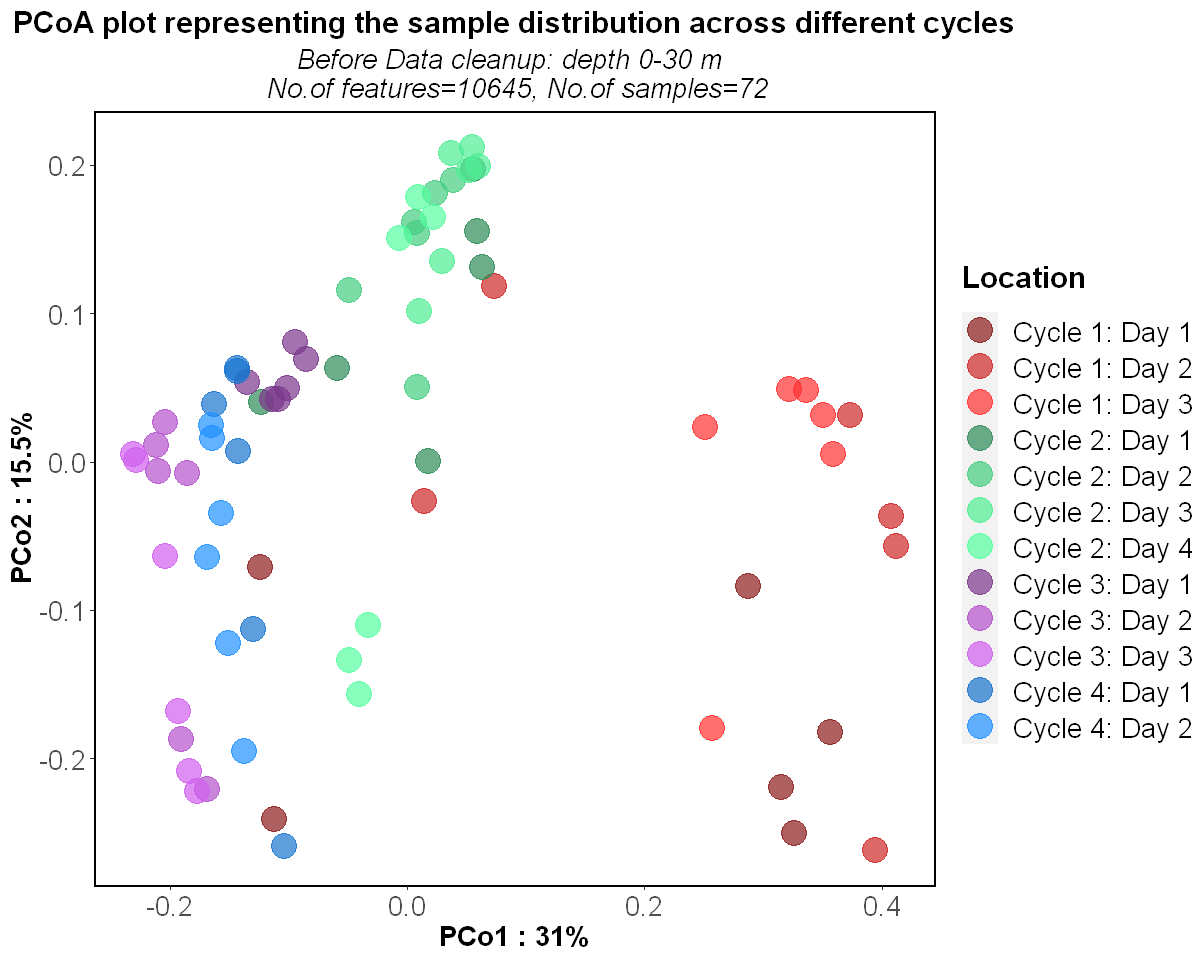

In [108]:
Plots[[1]]

In [396]:
ggsave(file="PCoA_lower_depth_before_cleanup.svg", plot=Plots[[1]], width=13, height=13)
dev.off()

null device 
          1

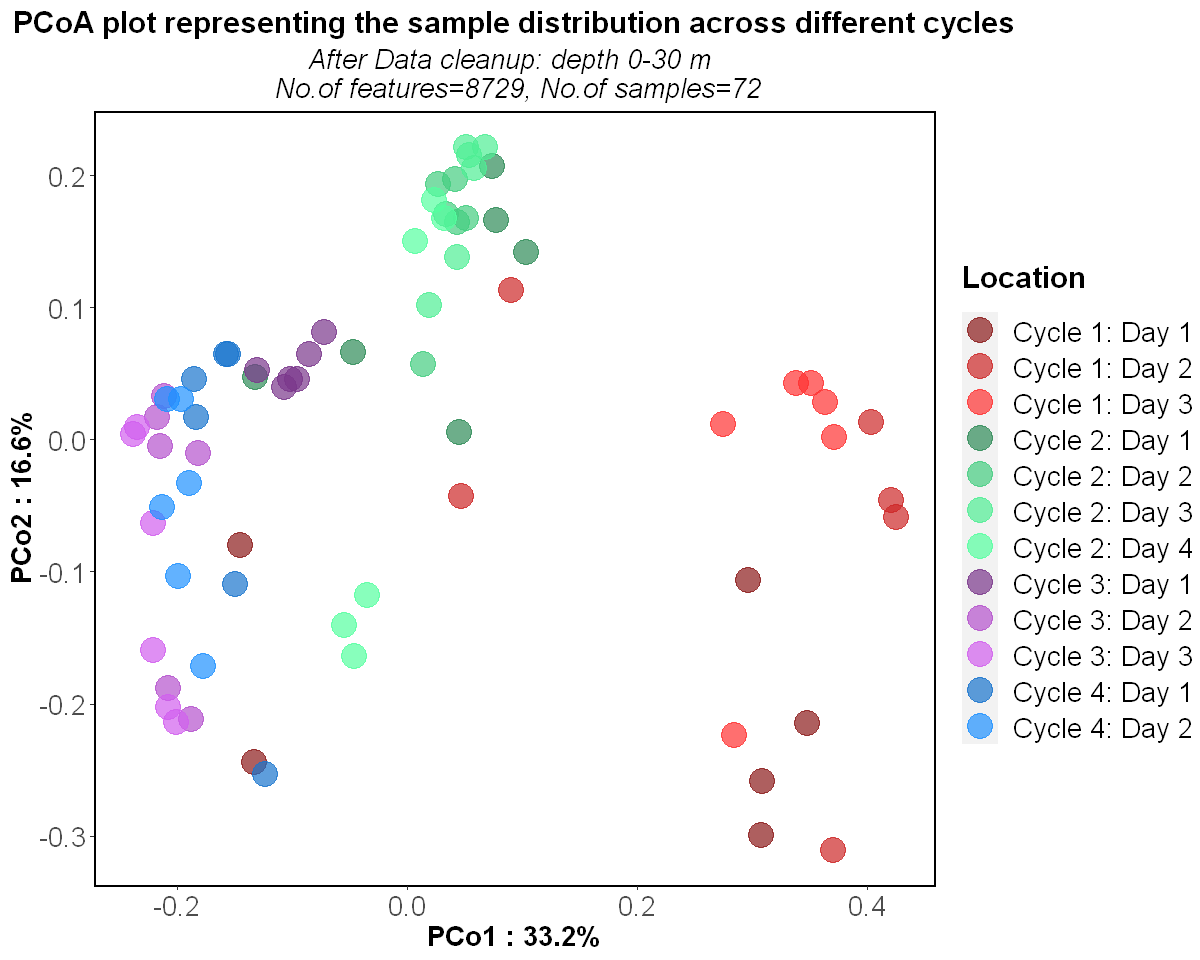

In [109]:
Plots[[2]]

In [398]:
ggsave(file="PCoA_lower_depth_after_cleanup.svg", plot=Plots[[2]], width=13, height=13)
dev.off()

null device 
          1

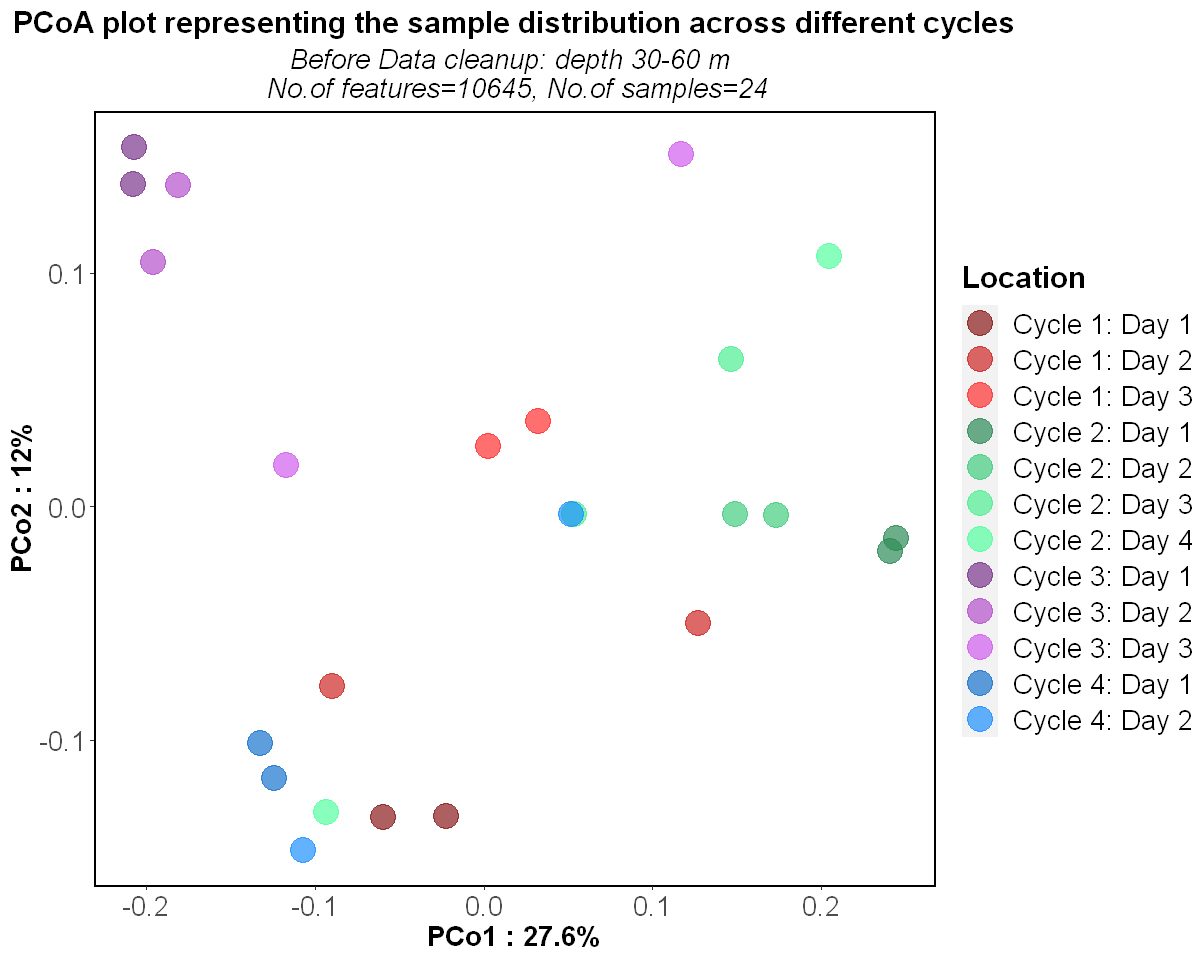

In [110]:
Plots[[3]]

In [400]:
ggsave(file="PCoA_higher_depth_before_cleanup.svg", plot=Plots[[3]], width=13, height=13)
dev.off()

null device 
          1

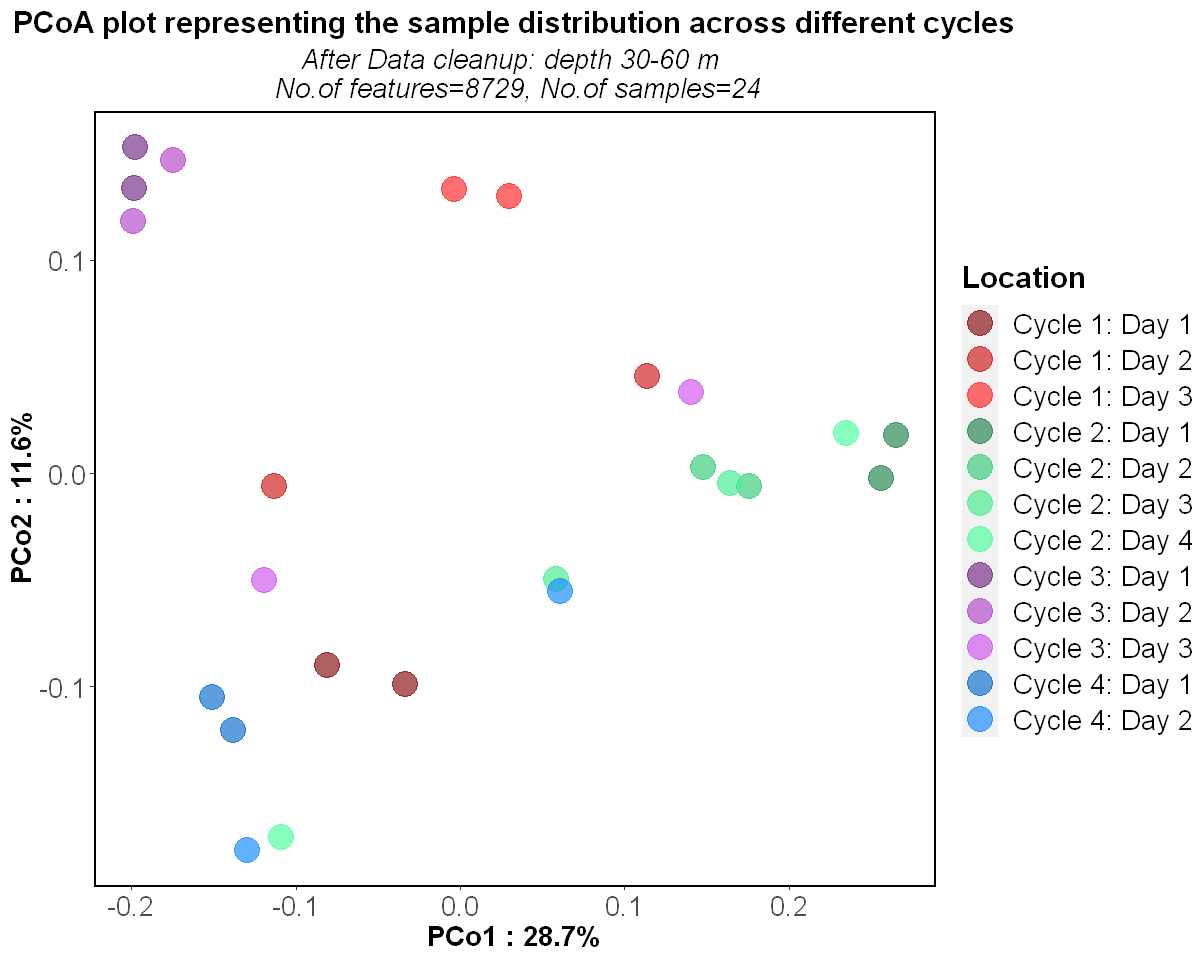

In [111]:
Plots[[4]]

In [402]:
ggsave(file="PCoA_higher_depth_after_cleanup.svg", plot=Plots[[4]], width=13, height=13)
dev.off()

null device 
          1

## 2) MDS plots for ASV table:

In [112]:
asv16s_url <-"https://raw.githubusercontent.com/Functional-Metabolomics-Lab/CCE_Data-Analysis/main/20220914_Input_files_for_Correlation_analysis/ASV_16S_With_Metadata.csv"
asv18s_url <- "https://raw.githubusercontent.com/Functional-Metabolomics-Lab/CCE_Data-Analysis/main/20220914_Input_files_for_Correlation_analysis/ASV_18SV9_FullDepth_With_Metadata.csv"

In [114]:
asv16s <- read.csv(asv16s_url, header = T, check.names = F)
asv18s <- read.csv(asv18s_url, header = T, check.names = F)

In [115]:
head(asv16s,3) #looking at first 6 rows
tail(asv16s,3) #looking at last 6 rows
dim(asv16s)

,,CCE_P1706_100.mzxml,CCE_P1706_102.mzxml,CCE_P1706_104.mzxml,CCE_P1706_106.mzxml,CCE_P1706_108.mzxml,CCE_P1706_110.mzxml,CCE_P1706_112.mzxml,CCE_P1706_114.mzxml,CCE_P1706_116.mzxml,...,CCE_P1706_96.mzxml,CCE_P1706_98.mzxml,Class16S,Confidence,Domain16S,Family16S,Genus16S,Order16S,Phylum16S,Species16S
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,...,<chr>,<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
1,00208b62ef66aa36e069777b853c8f17,0,0,0,0,0,0,0,0,0,...,0,0,Deltaproteobacteria,0.8284995,Bacteria,NA,NA,SAR324 clade(Marine group B),Proteobacteria,NA
2,00232f374cfc930f3fffbaef0d0c6d80,0,0,0,0,0,0,0,0,0,...,0,0,Gammaproteobacteria,1.0000000,Bacteria,NA,NA,NA,Proteobacteria,NA
3,0023a8c071538909ed3386e4e1d52278,0,0,0,0,0,0,0,0,0,...,0,0,Ignavibacteria,0.7360358,Bacteria,uncultured organism,uncultured organism,OPB56,Bacteroidetes,uncultured organism


,,CCE_P1706_100.mzxml,CCE_P1706_102.mzxml,CCE_P1706_104.mzxml,CCE_P1706_106.mzxml,CCE_P1706_108.mzxml,CCE_P1706_110.mzxml,CCE_P1706_112.mzxml,CCE_P1706_114.mzxml,CCE_P1706_116.mzxml,...,CCE_P1706_96.mzxml,CCE_P1706_98.mzxml,Class16S,Confidence,Domain16S,Family16S,Genus16S,Order16S,Phylum16S,Species16S
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,...,<chr>,<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
7536,ATTRIBUTE_Depth,100,70,38,24,15,0,100,70,44,...,12,0,NA,NA,NA,NA,NA,NA,NA,NA
7537,ATTRIBUTE_Depth_Range,70-150,70-150,40-60,0-30,0-30,0-30,70-150,70-150,40-60,...,0-30,0-30,NA,NA,NA,NA,NA,NA,NA,NA
7538,ATTRIBUTE_Location,Cycle_2_day3,Cycle_2_day3,Cycle_2_day3,Cycle_2_day3,Cycle_2_day3,Cycle_2_day3,Cycle_2_day4,Cycle_2_day4,Cycle_2_day4,...,Cycle_2_day2,Cycle_2_day2,NA,NA,NA,NA,NA,NA,NA,NA


[1] 7538   80

In [116]:
head(asv18s,2) #looking at first 2 rows
tail(asv18s,4) #looking at last 4 rows
dim(asv18s)

,,CCE_P1706_100.mzxml,CCE_P1706_102.mzxml,CCE_P1706_104.mzxml,CCE_P1706_106.mzxml,CCE_P1706_108.mzxml,CCE_P1706_110.mzxml,CCE_P1706_112.mzxml,CCE_P1706_114.mzxml,CCE_P1706_116.mzxml,...,Class18SV9,Confidence,Domain18SV9,Family18SV9,Genus18SV9,Kingdom18SV9,Order18SV9,Phylum18SV9,Species18SV9,X
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,...,<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<int>
1,000167ce642266c21c62843e4a010266,0,0,0,0,0,0,0,0,0,...,Acantharea,0.9991760,Eukaryota,Acantharea_XX,Acantharea_XXX,Rhizaria,Acantharea_X,Radiolaria,Acantharea_XXX_sp.,6114
2,001567b7cb76eecd73f31a288fcfcb69,0,0,0,0,0,0,0,0,0,...,NA,0.7359983,Eukaryota,NA,NA,Stramenopiles,NA,NA,NA,9879


,,CCE_P1706_100.mzxml,CCE_P1706_102.mzxml,CCE_P1706_104.mzxml,CCE_P1706_106.mzxml,CCE_P1706_108.mzxml,CCE_P1706_110.mzxml,CCE_P1706_112.mzxml,CCE_P1706_114.mzxml,CCE_P1706_116.mzxml,...,Class18SV9,Confidence,Domain18SV9,Family18SV9,Genus18SV9,Kingdom18SV9,Order18SV9,Phylum18SV9,Species18SV9,X
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,...,<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<int>
10283,ATTRIBUTE_Filament_Possition,Cycle_2,Cycle_2,Cycle_2,Cycle_2,Cycle_2,Cycle_2,Cycle_2,Cycle_2,Cycle_2,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
10284,ATTRIBUTE_Depth,100,70,38,24,15,0,100,70,44,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
10285,ATTRIBUTE_Depth_Range,70-150,70-150,40-60,0-30,0-30,0-30,70-150,70-150,40-60,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
10286,ATTRIBUTE_Location,Cycle_2_day3,Cycle_2_day3,Cycle_2_day3,Cycle_2_day3,Cycle_2_day3,Cycle_2_day3,Cycle_2_day4,Cycle_2_day4,Cycle_2_day4,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA


[1] 10286    82

In [117]:
#transposing asv16s and asv18s to filter based on ATTRIBUTE_depths
a16 <- as.data.frame(t(asv16s))
head(a16,3)
a18 <- as.data.frame(t(asv18s))
head(a18,3)

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V7529,V7530,V7531,V7532,V7533,V7534,V7535,V7536,V7537,V7538
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,...,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
,00208b62ef66aa36e069777b853c8f17,00232f374cfc930f3fffbaef0d0c6d80,0023a8c071538909ed3386e4e1d52278,00256e2eb0d211a7498c3e8b3170cedd,002ae12276a5da377dd6f7d5452a388a,002c14075180e4484913e02e02dead50,0037dde1e3445df605c9a00529c7d179,005cdee26e47c8b59e77d9959e57ea07,005e0e382cf794c32e587e2c38e99afa,006d426394f0d27aba26711be03dc7f5,...,ffdc94d7a96eb96642da81b3427afb39,ffdecce8789c89374e053ab51727b002,ffea7457de7711f0b6e83c715de10cce,ffec0d080d61f2b82dde351ab6f0a910,ffef24b37b1b776cb28ad016e7de42e5,fff6021aa804b067a34d2232b24543b9,ATTRIBUTE_Filament_Possition,ATTRIBUTE_Depth,ATTRIBUTE_Depth_Range,ATTRIBUTE_Location
CCE_P1706_100.mzxml,0,0,0,0,0,0,0,0,0,0,...,0,0,38,0,0,0,Cycle_2,100,70-150,Cycle_2_day3
CCE_P1706_102.mzxml,0,0,0,0,0,0,0,0,0,0,...,0,83,5,0,0,0,Cycle_2,70,70-150,Cycle_2_day3


,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V10277,V10278,V10279,V10280,V10281,V10282,V10283,V10284,V10285,V10286
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,...,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
,000167ce642266c21c62843e4a010266,001567b7cb76eecd73f31a288fcfcb69,0018f741aa09de859e5af52f19a2b7c1,00236daa14e0b5a92c512b565be61b51,003695728276f773ed0c54ca361198e2,0038284216ef9b1f951a5f4e5d4a3aea,0042507adc12d70fded8650d7e9e54e9,00482dfd4a6f36282fb943156003933f,004b45be5cc55d43e8698ea39928c602,004c5be3ebe308f5a1271f0aa148760e,...,ffe23b03cdf5c9f5312dcccee7f3f77f,ffe54578f9edb0240d83bcc4a631cd44,ffe979bfe30f936debe83be8fb6aa6a2,fff029b5d011575e455309b7e2d0ccb2,fff38cee81ac947847225f6e1dc72e4c,ffff579e1d89f988761c807c5a7ac89c,ATTRIBUTE_Filament_Possition,ATTRIBUTE_Depth,ATTRIBUTE_Depth_Range,ATTRIBUTE_Location
CCE_P1706_100.mzxml,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,Cycle_2,100,70-150,Cycle_2_day3
CCE_P1706_102.mzxml,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,Cycle_2,70,70-150,Cycle_2_day3


In [118]:
dim(a16)
dim(a18)

[1]   80 7538

[1]    82 10286

In [119]:
# giving 1st row as column names
colnames(a16) <- a16[1,]
colnames(a18) <- a18[1,]
# removing the 1st row
a16 <- a16[-1,]
a18 <- a18[-1,]

Looking at the last 3 rows to see whether the ATTRIBUTE info is empty because the last few rows have Taxa info.

In [239]:
tail(a16,3)

,00208b62ef66aa36e069777b853c8f17,00232f374cfc930f3fffbaef0d0c6d80,0023a8c071538909ed3386e4e1d52278,00256e2eb0d211a7498c3e8b3170cedd,002ae12276a5da377dd6f7d5452a388a,002c14075180e4484913e02e02dead50,0037dde1e3445df605c9a00529c7d179,005cdee26e47c8b59e77d9959e57ea07,005e0e382cf794c32e587e2c38e99afa,006d426394f0d27aba26711be03dc7f5,...,ffdc94d7a96eb96642da81b3427afb39,ffdecce8789c89374e053ab51727b002,ffea7457de7711f0b6e83c715de10cce,ffec0d080d61f2b82dde351ab6f0a910,ffef24b37b1b776cb28ad016e7de42e5,fff6021aa804b067a34d2232b24543b9,ATTRIBUTE_Filament_Possition,ATTRIBUTE_Depth,ATTRIBUTE_Depth_Range,ATTRIBUTE_Location
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,...,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
Order16S,SAR324 clade(Marine group B),NA,OPB56,NA,Flavobacteriales,Flavobacteriales,Chromatiales,Flavobacteriales,NA,NA,...,Thalassobaculales,Myxococcales,Parvibaculales,SAR86 clade,Rickettsiales,KI89A clade,NA,NA,NA,NA
Phylum16S,Proteobacteria,Proteobacteria,Bacteroidetes,Marinimicrobia (SAR406 clade),Bacteroidetes,Bacteroidetes,Proteobacteria,Bacteroidetes,Proteobacteria,Proteobacteria,...,Proteobacteria,Proteobacteria,Proteobacteria,Proteobacteria,Proteobacteria,Proteobacteria,NA,NA,NA,NA
Species16S,NA,NA,uncultured organism,NA,NA,uncultured Bacteroidetes/Chlorobi group bacterium,uncultured bacterium,uncultured marine bacterium,NA,NA,...,NA,uncultured marine bacterium,uncultured PS1 clade bacterium,NA,NA,NA,NA,NA,NA,NA


In [240]:
a16$ATTRIBUTE_Depth <- as.numeric(a16$ATTRIBUTE_Depth)
a18$ATTRIBUTE_Depth <- as.numeric(a18$ATTRIBUTE_Depth)

Splitting the data into low and high according to depths for both asv 16s and 18s.

In [289]:
a16_low <- a16 %>% filter(ATTRIBUTE_Depth <= 30)
a18_low <- a18 %>% filter(ATTRIBUTE_Depth <= 30)

a16_high <- a16 %>% filter(ATTRIBUTE_Depth > 30, ATTRIBUTE_Depth <= 60)
a18_high <- a18 %>% filter(ATTRIBUTE_Depth > 30, ATTRIBUTE_Depth <= 60)

In [290]:
head(a16_low,3)
dim(a16_low)

,00208b62ef66aa36e069777b853c8f17,00232f374cfc930f3fffbaef0d0c6d80,0023a8c071538909ed3386e4e1d52278,00256e2eb0d211a7498c3e8b3170cedd,002ae12276a5da377dd6f7d5452a388a,002c14075180e4484913e02e02dead50,0037dde1e3445df605c9a00529c7d179,005cdee26e47c8b59e77d9959e57ea07,005e0e382cf794c32e587e2c38e99afa,006d426394f0d27aba26711be03dc7f5,...,ffdc94d7a96eb96642da81b3427afb39,ffdecce8789c89374e053ab51727b002,ffea7457de7711f0b6e83c715de10cce,ffec0d080d61f2b82dde351ab6f0a910,ffef24b37b1b776cb28ad016e7de42e5,fff6021aa804b067a34d2232b24543b9,ATTRIBUTE_Filament_Possition,ATTRIBUTE_Depth,ATTRIBUTE_Depth_Range,ATTRIBUTE_Location
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,...,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<chr>,<chr>
CCE_P1706_106.mzxml,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,Cycle_2,24,0-30,Cycle_2_day3
CCE_P1706_108.mzxml,0,0,0,0,0,0,0,0,0,0,...,0,0,100,0,0,0,Cycle_2,15,0-30,Cycle_2_day3
CCE_P1706_110.mzxml,0,0,0,0,0,0,0,0,0,0,...,0,0,93,0,0,0,Cycle_2,0,0-30,Cycle_2_day3


[1]   35 7538

In [291]:
table(a16_low$ATTRIBUTE_Depth)


 0  2  5  8 10 11 12 15 18 20 21 22 24 25 30 
 8  3  1  1  3  2  2  2  1  5  2  1  1  1  2 

In [292]:
table(a16_low$ATTRIBUTE_Location) #only cycle data present


Cycle_1_day1 Cycle_1_day2 Cycle_1_day3 Cycle_2_day1 Cycle_2_day2 Cycle_2_day3 
           3            3            3            3            3            3 
Cycle_2_day4 Cycle_3_day1 Cycle_3_day2 Cycle_3_day3 Cycle_4_day1 Cycle_4_day2 
           3            3            3            3            3            2 

In [293]:
#removing all the attribute columns:
a16_low <- a16_low %>% select(!contains("ATTRIBUTE"))
a18_low <- a18_low %>% select(!contains("ATTRIBUTE"))

a16_high <- a16_high %>% select(!contains("ATTRIBUTE"))
a18_high <- a18_high %>% select(!contains("ATTRIBUTE"))

In [294]:
head(a16_low,3)
dim(a16_low)

,00208b62ef66aa36e069777b853c8f17,00232f374cfc930f3fffbaef0d0c6d80,0023a8c071538909ed3386e4e1d52278,00256e2eb0d211a7498c3e8b3170cedd,002ae12276a5da377dd6f7d5452a388a,002c14075180e4484913e02e02dead50,0037dde1e3445df605c9a00529c7d179,005cdee26e47c8b59e77d9959e57ea07,005e0e382cf794c32e587e2c38e99afa,006d426394f0d27aba26711be03dc7f5,...,ffc99b0e1b1d7ec9541d9bb172f461ea,ffcfd47e25ea2051dbb23b68f9a03b24,ffd2a5398b844287a2d241e5e86b953b,ffdc21f4e2240d36c3500987b483cfc3,ffdc94d7a96eb96642da81b3427afb39,ffdecce8789c89374e053ab51727b002,ffea7457de7711f0b6e83c715de10cce,ffec0d080d61f2b82dde351ab6f0a910,ffef24b37b1b776cb28ad016e7de42e5,fff6021aa804b067a34d2232b24543b9
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,...,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
CCE_P1706_106.mzxml,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
CCE_P1706_108.mzxml,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,100,0,0,0
CCE_P1706_110.mzxml,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,93,0,0,0


[1]   35 7534

In [295]:
# transposing again:
a16_low <- as.data.frame(t(a16_low))
a18_low <- as.data.frame(t(a18_low))

a16_high <- as.data.frame(t(a16_high))
a18_high <- as.data.frame(t(a18_high))

In [296]:
head(a16_low,3)
dim(a16_low)

,CCE_P1706_106.mzxml,CCE_P1706_108.mzxml,CCE_P1706_110.mzxml,CCE_P1706_118.mzxml,CCE_P1706_120.mzxml,CCE_P1706_122.mzxml,CCE_P1706_160.mzxml,CCE_P1706_162.mzxml,CCE_P1706_164.mzxml,CCE_P1706_172.mzxml,...,CCE_P1706_62.mzxml,CCE_P1706_70.mzxml,CCE_P1706_72.mzxml,CCE_P1706_74.mzxml,CCE_P1706_82.mzxml,CCE_P1706_84.mzxml,CCE_P1706_86.mzxml,CCE_P1706_94.mzxml,CCE_P1706_96.mzxml,CCE_P1706_98.mzxml
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,...,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
00208b62ef66aa36e069777b853c8f17,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
00232f374cfc930f3fffbaef0d0c6d80,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0023a8c071538909ed3386e4e1d52278,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


[1] 7534   35

In [297]:
a16_low <- a16_low %>% mutate_all(as.numeric)
a18_low <- a18_low %>% mutate_all(as.numeric)
a16_high <- a16_high %>% mutate_all(as.numeric)
a18_high <- a18_high %>% mutate_all(as.numeric)

head(a16_low,3)

,CCE_P1706_106.mzxml,CCE_P1706_108.mzxml,CCE_P1706_110.mzxml,CCE_P1706_118.mzxml,CCE_P1706_120.mzxml,CCE_P1706_122.mzxml,CCE_P1706_160.mzxml,CCE_P1706_162.mzxml,CCE_P1706_164.mzxml,CCE_P1706_172.mzxml,...,CCE_P1706_62.mzxml,CCE_P1706_70.mzxml,CCE_P1706_72.mzxml,CCE_P1706_74.mzxml,CCE_P1706_82.mzxml,CCE_P1706_84.mzxml,CCE_P1706_86.mzxml,CCE_P1706_94.mzxml,CCE_P1706_96.mzxml,CCE_P1706_98.mzxml
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,...,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
00208b62ef66aa36e069777b853c8f17,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
00232f374cfc930f3fffbaef0d0c6d80,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0023a8c071538909ed3386e4e1d52278,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Getting the metadata info for PCoA coloring: `md_pcoa[[1]]` is md info for depth 0-30

In [298]:
head(md_pcoa[[1]],3)
dim(md_pcoa[[1]])

,ATTRIBUTE_x,ATTRIBUTE_y,ATTRIBUTE_z,ATTRIBUTE_Spot_size,ATTRIBUTE_Filament_Possition,ATTRIBUTE_Sample_Number,ATTRIBUTE_Date,ATTRIBUTE_Cast,ATTRIBUTE_Event_Number,ATTRIBUTE_Bottle,...,ATTRIBUTE_O2_Saturation__per_,ATTRIBUTE_O2_saturation_binned,ATTRIBUTE_PO4,ATTRIBUTE_NO2,ATTRIBUTE_NO3,ATTRIBUTE_NH4,ATTRIBUTE_PO4_binned,ATTRIBUTE_NO2_binned,ATTRIBUTE_NO3_binned,ATTRIBUTE_NH4_binned
,<dbl>,<dbl>,<dbl>,<int>,<chr>,<int>,<int>,<int>,<int>,<int>,...,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>
CCE_P1706_45.mzxml,-101.419,101.956,111.884,1,Cycle_1,45,20170609,16,216,14,...,53.69023,50_60,1.509,0.434,16.134,2.105,1.5,0.4,16,2.1
CCE_P1706_46.mzxml,-101.419,101.956,111.884,1,Cycle_1,46,20170609,16,216,14,...,53.69023,50_60,1.509,0.434,16.134,2.105,1.5,0.4,16,2.1
CCE_P1706_47.mzxml,-101.419,101.956,112.344,1,Cycle_1,47,20170609,16,216,20,...,73.62961,70_80,0.893,0.272,10.750,0.331,0.9,0.3,11,0.3


[1] 72 32

In [299]:
#Lets try to pick the metadata for ASV from the rownames of previous dataframes
md_a16_low <- md_pcoa[[1]][which(rownames(md_pcoa[[1]])%in%colnames(a16_low)),]
md_a18_low <- md_pcoa[[1]][which(rownames(md_pcoa[[1]])%in%colnames(a18_low)),] 

md_a16_high <- md_pcoa[[2]][which(rownames(md_pcoa[[2]])%in%colnames(a16_high)),] 
md_a18_high <- md_pcoa[[2]][which(rownames(md_pcoa[[2]])%in%colnames(a18_high)),] 

In [300]:
dim(md_a18_high)

[1] 12 32

In [301]:
head(md_a16_low,3)
dim(md_a16_low)

,ATTRIBUTE_x,ATTRIBUTE_y,ATTRIBUTE_z,ATTRIBUTE_Spot_size,ATTRIBUTE_Filament_Possition,ATTRIBUTE_Sample_Number,ATTRIBUTE_Date,ATTRIBUTE_Cast,ATTRIBUTE_Event_Number,ATTRIBUTE_Bottle,...,ATTRIBUTE_O2_Saturation__per_,ATTRIBUTE_O2_saturation_binned,ATTRIBUTE_PO4,ATTRIBUTE_NO2,ATTRIBUTE_NO3,ATTRIBUTE_NH4,ATTRIBUTE_PO4_binned,ATTRIBUTE_NO2_binned,ATTRIBUTE_NO3_binned,ATTRIBUTE_NH4_binned
,<dbl>,<dbl>,<dbl>,<int>,<chr>,<int>,<int>,<int>,<int>,<int>,...,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>
CCE_P1706_46.mzxml,-101.419,101.956,111.884,1,Cycle_1,46,20170609,16,216,14,...,53.69023,50_60,1.509,0.434,16.134,2.105,1.5,0.4,16,2.1
CCE_P1706_48.mzxml,-101.419,101.956,112.344,1,Cycle_1,48,20170609,16,216,20,...,73.62961,70_80,0.893,0.272,10.750,0.331,0.9,0.3,11,0.3
CCE_P1706_50.mzxml,-101.419,101.956,112.786,1,Cycle_1,50,20170609,16,216,23,...,78.27125,70_80,0.682,0.233,7.773,0.304,0.7,0.2,8,0.3


[1] 35 32

In [302]:
#ordering the rows of md_dataframes by rownames
md_a16_low <- md_a16_low[order(rownames(md_a16_low)),]
md_a18_low <- md_a18_low[order(rownames(md_a18_low)),]

md_a16_high <- md_a16_high[order(rownames(md_a16_high)),]
md_a18_high <- md_a18_high[order(rownames(md_a18_high)),]

In [303]:
#ordering the columns of asv dataframes by colnames as well
a16_low <- a16_low[,order(colnames(a16_low))]
a18_low <- a18_low[,order(colnames(a18_low))]

a16_high <- a16_high[,order(colnames(a16_high))]
a18_high <- a18_high[,order(colnames(a18_high))]

In [304]:
#checking if the rownames are same. All should return TRUE
identical(rownames(md_a16_low),colnames(a16_low))
identical(rownames(md_a18_low),colnames(a18_low))

identical(rownames(md_a16_high),colnames(a16_high))
identical(rownames(md_a18_high),colnames(a18_high))

[1] TRUE

[1] TRUE

[1] TRUE

[1] TRUE

Lets chcek for asv16s_low

In [305]:
head(md_a16_low,3)
dim(md_a16_low)

,ATTRIBUTE_x,ATTRIBUTE_y,ATTRIBUTE_z,ATTRIBUTE_Spot_size,ATTRIBUTE_Filament_Possition,ATTRIBUTE_Sample_Number,ATTRIBUTE_Date,ATTRIBUTE_Cast,ATTRIBUTE_Event_Number,ATTRIBUTE_Bottle,...,ATTRIBUTE_O2_Saturation__per_,ATTRIBUTE_O2_saturation_binned,ATTRIBUTE_PO4,ATTRIBUTE_NO2,ATTRIBUTE_NO3,ATTRIBUTE_NH4,ATTRIBUTE_PO4_binned,ATTRIBUTE_NO2_binned,ATTRIBUTE_NO3_binned,ATTRIBUTE_NH4_binned
,<dbl>,<dbl>,<dbl>,<int>,<chr>,<int>,<int>,<int>,<int>,<int>,...,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>
CCE_P1706_106.mzxml,-122.741,93.1175,111.884,1,Cycle_2,106,20170615,32,364,16,...,72.23554,70_80,0.783,0.361,8.117,0.883,0.8,0.4,8,0.9
CCE_P1706_108.mzxml,-122.741,93.1175,112.344,1,Cycle_2,108,20170615,32,364,20,...,76.00793,70_80,0.789,0.360,8.070,0.862,0.8,0.4,8,0.9
CCE_P1706_110.mzxml,-122.741,93.1175,112.786,1,Cycle_2,110,20170615,32,364,24,...,76.14250,70_80,0.779,0.356,8.036,0.881,0.8,0.4,8,0.9


[1] 35 32

In [306]:
head(a16_low,3)
dim(a16_low)

,CCE_P1706_106.mzxml,CCE_P1706_108.mzxml,CCE_P1706_110.mzxml,CCE_P1706_118.mzxml,CCE_P1706_120.mzxml,CCE_P1706_122.mzxml,CCE_P1706_160.mzxml,CCE_P1706_162.mzxml,CCE_P1706_164.mzxml,CCE_P1706_172.mzxml,...,CCE_P1706_62.mzxml,CCE_P1706_70.mzxml,CCE_P1706_72.mzxml,CCE_P1706_74.mzxml,CCE_P1706_82.mzxml,CCE_P1706_84.mzxml,CCE_P1706_86.mzxml,CCE_P1706_94.mzxml,CCE_P1706_96.mzxml,CCE_P1706_98.mzxml
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,...,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
00208b62ef66aa36e069777b853c8f17,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
00232f374cfc930f3fffbaef0d0c6d80,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0023a8c071538909ed3386e4e1d52278,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


[1] 7534   35

In [307]:
dim(a18_low)
dim(a16_high)
dim(a18_high)

[1] 10282    35

[1] 7534   12

[1] 10282    12

PCoA:

In [308]:
a16low_dist <- vegdist(t(a16_low), method = "bray")
pcoa1 <- cmdscale(a16low_dist, eig = TRUE, x.ret=TRUE)
pcoa.var.per1 <- round(pcoa1$eig/sum(pcoa1$eig)*100,1)
pcoa.values1 <- pcoa1$points
head(pcoa.values1)

pcoa.data1 <- data.frame(md_a16_low$ATTRIBUTE_Depth_Range, ## depth 0-30
                                 X=pcoa.values1[,1],
                                 Y=pcoa.values1[,2])

CCE_P1706_106.mzxml,-0.05973571,-0.08228446
CCE_P1706_108.mzxml,0.20495680,-0.20876523
CCE_P1706_110.mzxml,0.16476164,-0.26693951
CCE_P1706_118.mzxml,0.22354054,-0.14251148
CCE_P1706_120.mzxml,0.19096364,-0.20518256
CCE_P1706_122.mzxml,0.24842885,-0.04825202


In [309]:
a18low_dist <- vegdist(t(a18_low), method = "bray")
pcoa2 <- cmdscale(a18low_dist, eig = TRUE, x.ret=TRUE)
pcoa.var.per2 <- round(pcoa2$eig/sum(pcoa2$eig)*100,1)
pcoa.values2 <- pcoa2$points
head(pcoa.values2)

pcoa.data2 <- data.frame(md_a18_low$ATTRIBUTE_Depth_Range, ## depth 0-30
                                 X=pcoa.values2[,1],
                                 Y=pcoa.values2[,2])

CCE_P1706_106.mzxml,-0.06974584,-0.1288903
CCE_P1706_108.mzxml,0.06923397,-0.3148392
CCE_P1706_110.mzxml,0.08137566,-0.3271948
CCE_P1706_118.mzxml,0.12830172,-0.2696071
CCE_P1706_120.mzxml,0.12926555,-0.2317025
CCE_P1706_122.mzxml,0.11489433,-0.2853247


In [310]:
a16high_dist <- vegdist(t(a16_high), method = "bray")
pcoa3 <- cmdscale(a16high_dist, eig = TRUE, x.ret=TRUE)
pcoa.var.per3 <- round(pcoa3$eig/sum(pcoa3$eig)*100,1)
pcoa.values3 <- pcoa3$points
head(pcoa.values3)

pcoa.data3 <- data.frame(md_a16_high$ATTRIBUTE_Depth_Range, ## depth 30-60
                                 X=pcoa.values3[,1],
                                 Y=pcoa.values3[,2])

CCE_P1706_104.mzxml,-0.3417165,0.10464089
CCE_P1706_116.mzxml,-0.2844497,-0.06063632
CCE_P1706_158.mzxml,0.4551846,-0.03828863
CCE_P1706_170.mzxml,0.3951068,-0.21462340
CCE_P1706_182.mzxml,0.1303473,-0.49048484
CCE_P1706_212.mzxml,-0.1093142,-0.07311343


In [311]:
a18high_dist <- vegdist(t(a18_high), method = "bray")
pcoa4 <- cmdscale(a18high_dist, eig = TRUE, x.ret=TRUE)
pcoa.var.per4 <- round(pcoa4$eig/sum(pcoa4$eig)*100,1)
pcoa.values4 <- pcoa4$points
head(pcoa.values4)

pcoa.data4 <- data.frame(md_a18_high$ATTRIBUTE_Depth_Range, ## depth 30-60
                                 X=pcoa.values4[,1],
                                 Y=pcoa.values4[,2])

CCE_P1706_104.mzxml,-0.36850651,-0.10263353
CCE_P1706_116.mzxml,-0.26085831,-0.06552382
CCE_P1706_158.mzxml,0.42041014,-0.32574131
CCE_P1706_170.mzxml,0.36391620,-0.15067439
CCE_P1706_182.mzxml,0.11511087,-0.26100306
CCE_P1706_212.mzxml,0.06274053,0.10454829


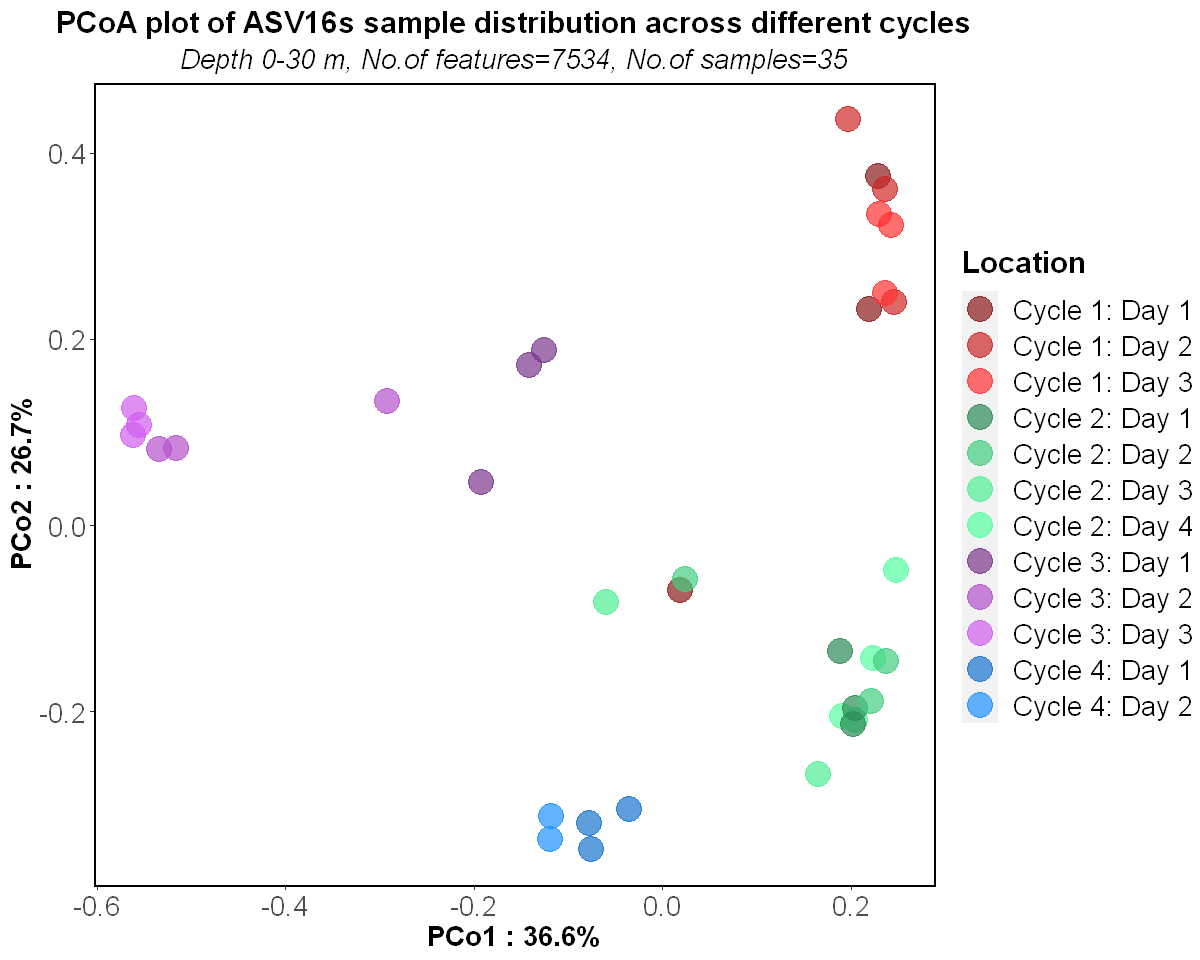

In [317]:
a16low_plot <-ggplot(pcoa.data1, aes(x=X, y=Y, col= as.factor(md_a16_low$ATTRIBUTE_Location))) + 
                  geom_point(size = 7,alpha = 0.7) +
                  labs(title="PCoA plot of ASV16s sample distribution across different cycles", 
                       color = "Location",
                       subtitle = "Depth 0-30 m, No.of features=7534, No.of samples=35") +
                  xlab(paste0("PCo1 : ",pcoa.var.per1[1],"%",sep="")) + 
                  ylab(paste0("PCo2 : ",pcoa.var.per1[2],"%",sep="")) + 
                 #theme(element_text(size = 22, face= 'bold',hjust=0.5))+
                  theme(axis.text = element_text(size = 16),
                        axis.title = element_text(size = 16, face= 'bold'),
                        plot.title = element_text(size = 18, face= 'bold',hjust=0.5),
                        plot.subtitle = element_text(size = 16,face= 'italic', hjust=0.5),
                        legend.title = element_text(size = 18, face= 'bold'),
                        legend.text = element_text(size = 16),
                        panel.background = element_blank(),
                        panel.border = element_rect(colour = "black", fill=NA, size=1)) +
                  scale_colour_manual(values = c("#8B1A1A","#CD2626","#FF3030",
                                                 "#2E8B57","#43CD80","#4EEE94","#54FF9F",
                                                 "#7A378B","#B452CD","#D15FEE",
                                                 "#1874CD","#1E90FF"),
                                      labels=c("Cycle 1: Day 1","Cycle 1: Day 2","Cycle 1: Day 3",
                                               "Cycle 2: Day 1","Cycle 2: Day 2","Cycle 2: Day 3","Cycle 2: Day 4",
                                               "Cycle 3: Day 1","Cycle 3: Day 2","Cycle 3: Day 3",
                                               "Cycle 4: Day 1","Cycle 4: Day 2")) +
                  theme(legend.key.size = unit(1.5, 'lines'))

a16low_plot

In [318]:
ggsave(file="PCoA_asv16s_lower_depth.svg", plot=a16low_plot, width=13, height=13)
dev.off()

null device 
          1

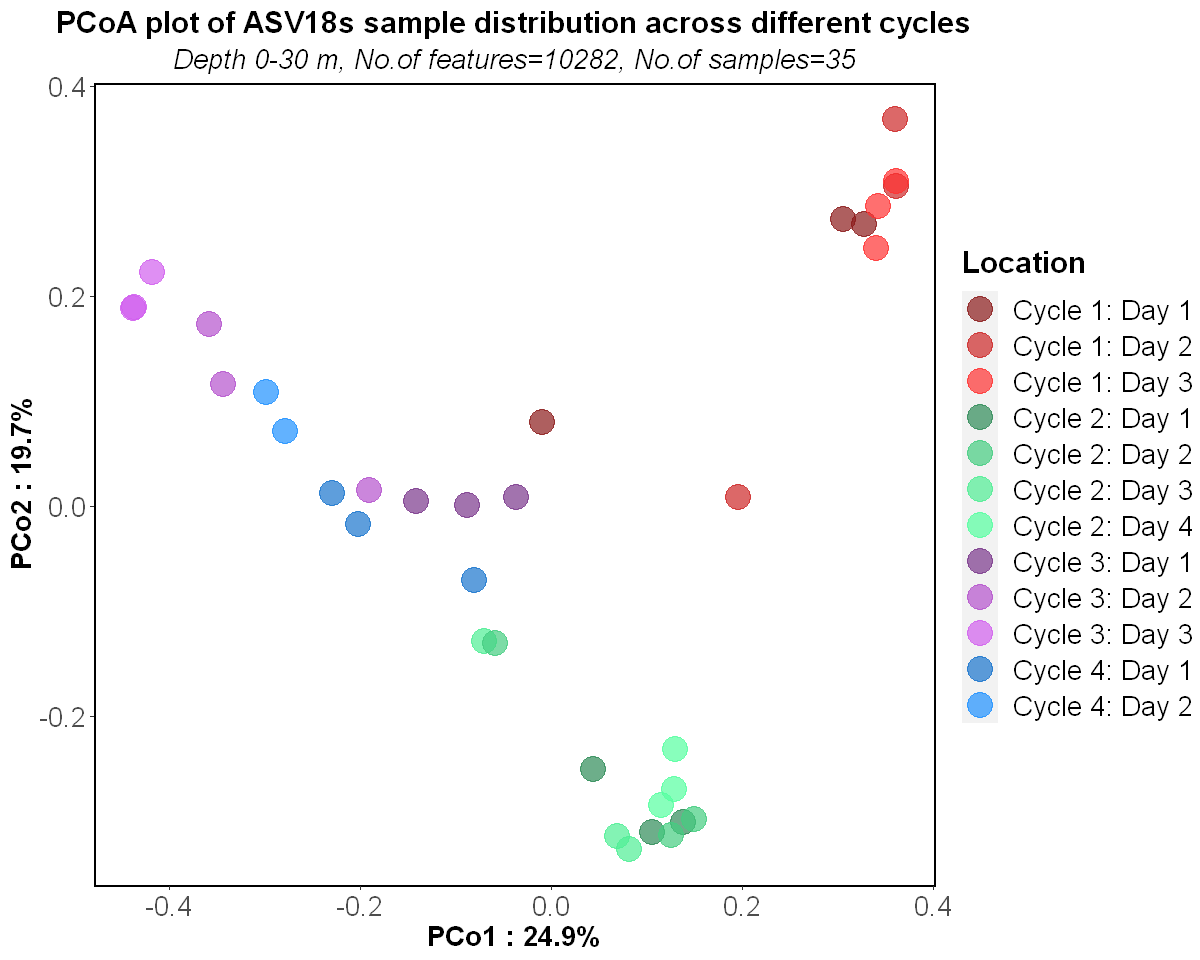

In [319]:
a18low_plot <-ggplot(pcoa.data2, aes(x=X, y=Y, col= as.factor(md_a18_low$ATTRIBUTE_Location))) + 
                  geom_point(size = 7,alpha = 0.7) +
                  labs(title="PCoA plot of ASV18s sample distribution across different cycles", 
                       color = "Location",
                       subtitle = "Depth 0-30 m, No.of features=10282, No.of samples=35") +
                  xlab(paste0("PCo1 : ",pcoa.var.per2[1],"%",sep="")) + 
                  ylab(paste0("PCo2 : ",pcoa.var.per2[2],"%",sep="")) + 
                 #theme(element_text(size = 22, face= 'bold',hjust=0.5))+
                  theme(axis.text = element_text(size = 16),
                        axis.title = element_text(size = 16, face= 'bold'),
                        plot.title = element_text(size = 18, face= 'bold',hjust=0.5),
                        plot.subtitle = element_text(size = 16,face= 'italic', hjust=0.5),
                        legend.title = element_text(size = 18, face= 'bold'),
                        legend.text = element_text(size = 16),
                        panel.background = element_blank(),
                        panel.border = element_rect(colour = "black", fill=NA, size=1)) +
                  scale_colour_manual(values = c("#8B1A1A","#CD2626","#FF3030",
                                                 "#2E8B57","#43CD80","#4EEE94","#54FF9F",
                                                 "#7A378B","#B452CD","#D15FEE",
                                                 "#1874CD","#1E90FF"),
                                      labels=c("Cycle 1: Day 1","Cycle 1: Day 2","Cycle 1: Day 3",
                                               "Cycle 2: Day 1","Cycle 2: Day 2","Cycle 2: Day 3","Cycle 2: Day 4",
                                               "Cycle 3: Day 1","Cycle 3: Day 2","Cycle 3: Day 3",
                                               "Cycle 4: Day 1","Cycle 4: Day 2")) +
                  theme(legend.key.size = unit(1.5, 'lines'))

a18low_plot

In [320]:
ggsave(file="PCoA_asv18s_lower_depth.svg", plot=a18low_plot, width=13, height=13)
dev.off()

null device 
          1

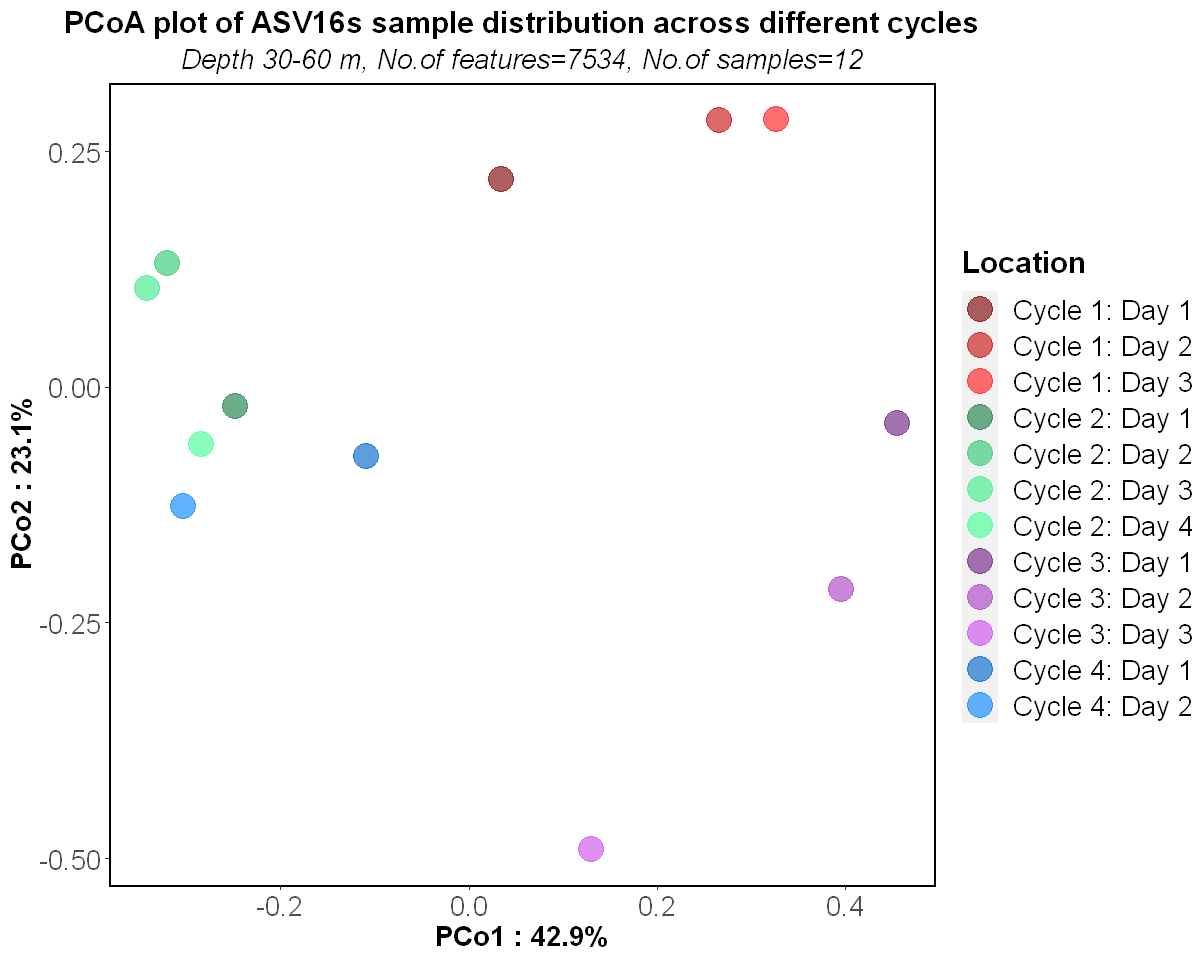

In [321]:
a16high_plot <-ggplot(pcoa.data3, aes(x=X, y=Y, col= as.factor(md_a16_high$ATTRIBUTE_Location))) + 
                  geom_point(size = 7,alpha = 0.7) +
                  labs(title="PCoA plot of ASV16s sample distribution across different cycles", 
                       color = "Location",
                       subtitle = "Depth 30-60 m, No.of features=7534, No.of samples=12") +
                  xlab(paste0("PCo1 : ",pcoa.var.per3[1],"%",sep="")) + 
                  ylab(paste0("PCo2 : ",pcoa.var.per3[2],"%",sep="")) + 
                 #theme(element_text(size = 22, face= 'bold',hjust=0.5))+
                  theme(axis.text = element_text(size = 16),
                        axis.title = element_text(size = 16, face= 'bold'),
                        plot.title = element_text(size = 18, face= 'bold',hjust=0.5),
                        plot.subtitle = element_text(size = 16,face= 'italic', hjust=0.5),
                        legend.title = element_text(size = 18, face= 'bold'),
                        legend.text = element_text(size = 16),
                        panel.background = element_blank(),
                        panel.border = element_rect(colour = "black", fill=NA, size=1)) +
                  scale_colour_manual(values = c("#8B1A1A","#CD2626","#FF3030",
                                                 "#2E8B57","#43CD80","#4EEE94","#54FF9F",
                                                 "#7A378B","#B452CD","#D15FEE",
                                                 "#1874CD","#1E90FF"),
                                      labels=c("Cycle 1: Day 1","Cycle 1: Day 2","Cycle 1: Day 3",
                                               "Cycle 2: Day 1","Cycle 2: Day 2","Cycle 2: Day 3","Cycle 2: Day 4",
                                               "Cycle 3: Day 1","Cycle 3: Day 2","Cycle 3: Day 3",
                                               "Cycle 4: Day 1","Cycle 4: Day 2")) +
                  theme(legend.key.size = unit(1.5, 'lines'))

a16high_plot

In [322]:
ggsave(file="PCoA_asv16s_higher_depth.svg", plot=a16high_plot, width=13, height=13)
dev.off()

null device 
          1

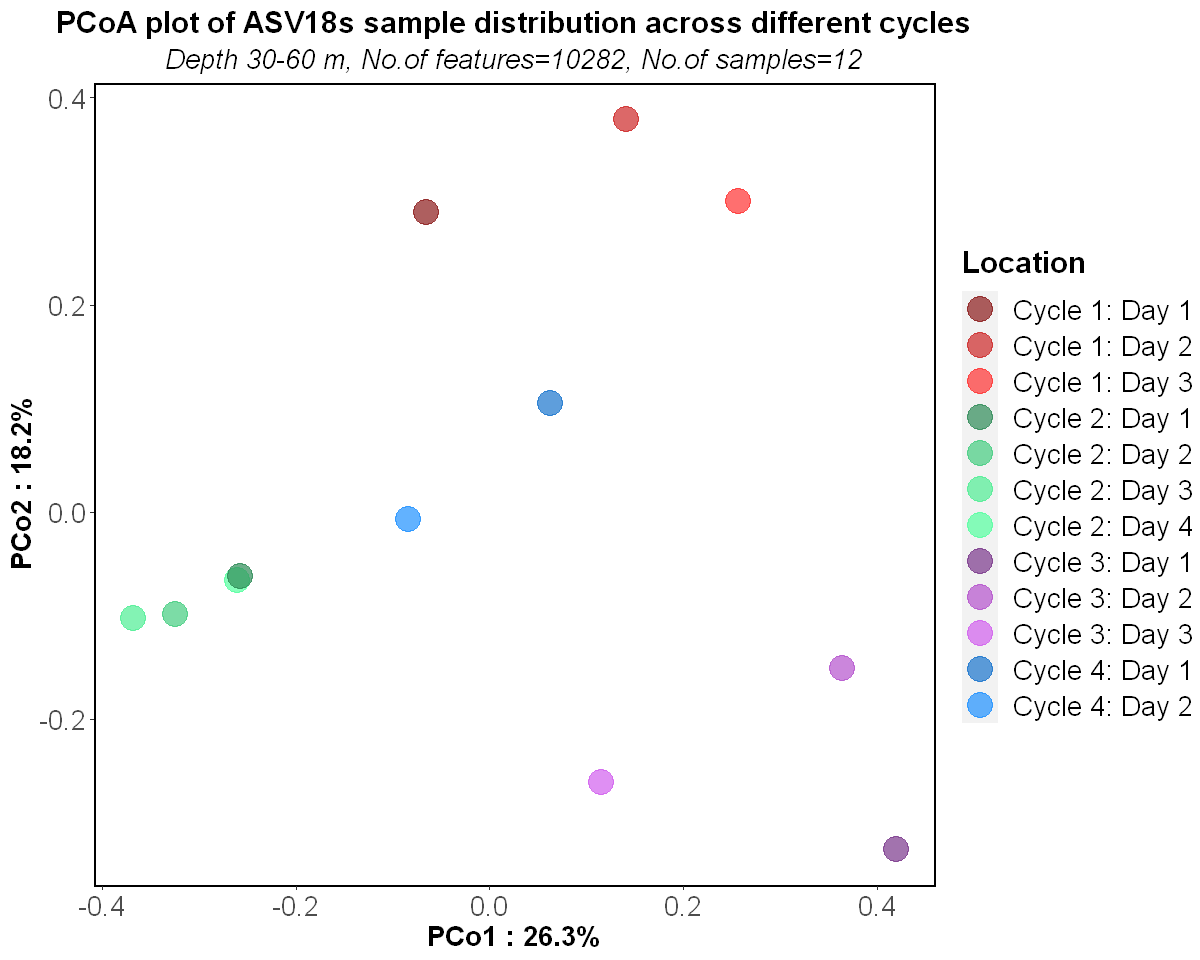

In [323]:
a18high_plot <-ggplot(pcoa.data4, aes(x=X, y=Y, col= as.factor(md_a18_high$ATTRIBUTE_Location))) + 
                  geom_point(size = 7,alpha = 0.7) +
                  labs(title="PCoA plot of ASV18s sample distribution across different cycles", 
                       color = "Location",
                       subtitle = "Depth 30-60 m, No.of features=10282, No.of samples=12") +
                  xlab(paste0("PCo1 : ",pcoa.var.per4[1],"%",sep="")) + 
                  ylab(paste0("PCo2 : ",pcoa.var.per4[2],"%",sep="")) + 
                 #theme(element_text(size = 22, face= 'bold',hjust=0.5))+
                  theme(axis.text = element_text(size = 16),
                        axis.title = element_text(size = 16, face= 'bold'),
                        plot.title = element_text(size = 18, face= 'bold',hjust=0.5),
                        plot.subtitle = element_text(size = 16,face= 'italic', hjust=0.5),
                        legend.title = element_text(size = 18, face= 'bold'),
                        legend.text = element_text(size = 16),
                        panel.background = element_blank(),
                        panel.border = element_rect(colour = "black", fill=NA, size=1)) +
                  scale_colour_manual(values = c("#8B1A1A","#CD2626","#FF3030",
                                                 "#2E8B57","#43CD80","#4EEE94","#54FF9F",
                                                 "#7A378B","#B452CD","#D15FEE",
                                                 "#1874CD","#1E90FF"),
                                      labels=c("Cycle 1: Day 1","Cycle 1: Day 2","Cycle 1: Day 3",
                                               "Cycle 2: Day 1","Cycle 2: Day 2","Cycle 2: Day 3","Cycle 2: Day 4",
                                               "Cycle 3: Day 1","Cycle 3: Day 2","Cycle 3: Day 3",
                                               "Cycle 4: Day 1","Cycle 4: Day 2")) +
                  theme(legend.key.size = unit(1.5, 'lines'))

a18high_plot

In [324]:
ggsave(file="PCoA_asv18s_higher_depth.svg", plot=a18high_plot, width=13, height=13)
dev.off()

null device 
          1

# Do not forget to download the output files from the Colab environment !!